In [ ]:
#Import necessary libraries
import numpy as np
import pandas as pd

#Load the datasets and Create an ExcelFile object
from google.colab import drive
drive.mount('/content/drive')
Data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Chain-5Years-Cleaned.csv')

In [ ]:
#Initial check
print(Data.head(5))
print('\n')
print(Data.dtypes)
print('\n')
print(Data.info())

In [ ]:
#Monthly Sales Analysis

MonthlySales = Data.groupby('MonthNumeric')['Cartons'].sum().reset_index()
MonthlySales = MonthlySales.sort_values(by='Cartons', ascending=False)
MonthlySales['Cartons'] = MonthlySales['Cartons'].apply(lambda x: f"{x:,}")

print(MonthlySales)

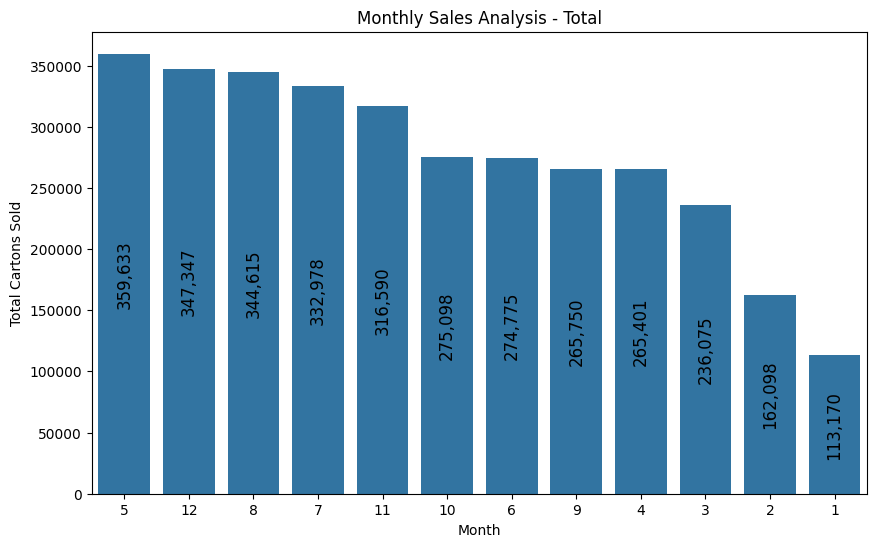

In [ ]:
#Monthly Sales Analysis - Plot
import seaborn as sns
import matplotlib.pyplot as plt

MonthlySales = Data.groupby('MonthNumeric')['Cartons'].sum().reset_index()
MonthlySales = MonthlySales.sort_values(by='Cartons', ascending=False)

#Sort the DataFrame by 'Cartons' in descending order
MonthlySales = MonthlySales.sort_values(by='Cartons', ascending=False)

#Reorder the categories in Seaborn's barplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='MonthNumeric', y='Cartons', data=MonthlySales, order=MonthlySales['MonthNumeric'])

#Add rotated text on top of each bar
for bar in ax.patches:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() / 2,
             f"{int(bar.get_height()):,}",
             ha='center', va='center', fontsize=12, rotation=90)

#Titles and labels
plt.title('Monthly Sales Analysis - Total')
plt.xlabel('Month')
plt.ylabel('Total Cartons Sold')
plt.show()

<ipython-input-6-a758544558c0>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(Data, x="MonthNumeric", y="Cartons", hue="Year", estimator="sum", ci=None, marker="o", palette=CustomPallete)


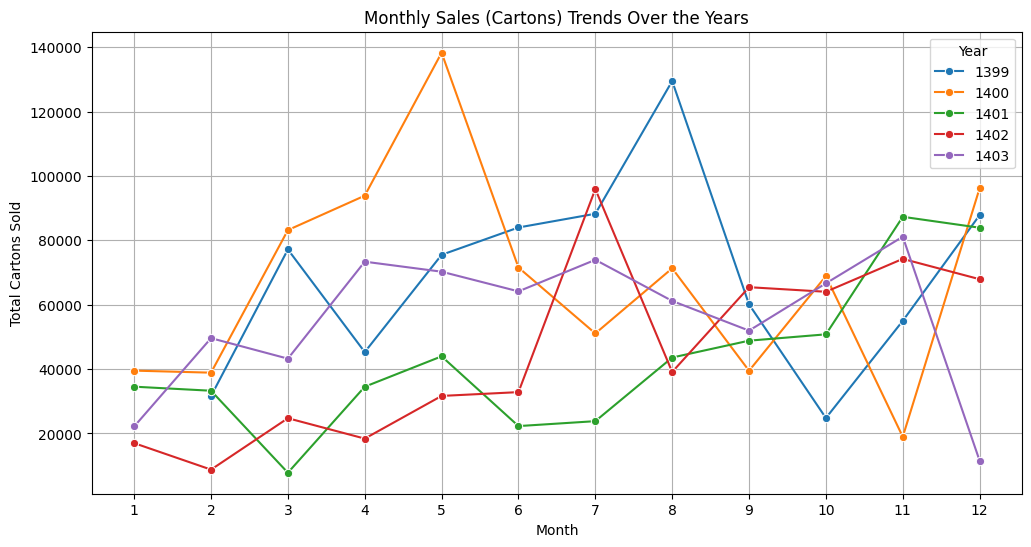

In [ ]:
#Monthly Sales (Cartons) Trends Over the Years

CustomPallete = {1399: '#1f77b4',
                 1400: '#ff7f0e',
                 1401: '#2ca02c',
                 1402: '#d62728',
                 1403: '#9467bd'}

plt.figure(figsize=(12, 6))
sns.lineplot(Data, x="MonthNumeric", y="Cartons", hue="Year", estimator="sum", ci=None, marker="o", palette=CustomPallete)
plt.title("Monthly Sales (Cartons) Trends Over the Years")
plt.xlabel("Month")
plt.ylabel("Total Cartons Sold")
plt.xticks(range(1, 13))
plt.legend(title="Year")
plt.grid(True)
plt.show()

In [ ]:
#Seasonal Sales Analysis

import seaborn as sns
import matplotlib.pyplot as plt

#Define seasons based on MonthNumeric
def AssignSeason(month):
  if month in [1, 2, 3]:
    return 'Season 1 (Spring)'
  if month in [4, 5, 6]:
    return 'Season 2 (Summer)'
  if month in [7, 8, 9]:
    return 'Season 3 (Autumn)'
  if month in [10, 11, 12]:
    return 'Season 4 (Winter)'
  else:
    return 'Unknown'

#Apply the function to create a new column
Data['Season'] = Data['MonthNumeric'].apply(AssignSeason)

#Group by Season and calculate cartons
SeasonalSales = Data.groupby('Season')['Cartons'].sum().reset_index()
SeasonalSales = SeasonalSales.sort_values(by='Cartons', ascending=False)
SeasonalSales["Cartons"] = SeasonalSales["Cartons"].apply(lambda x: f"{x:,}")

print(SeasonalSales)

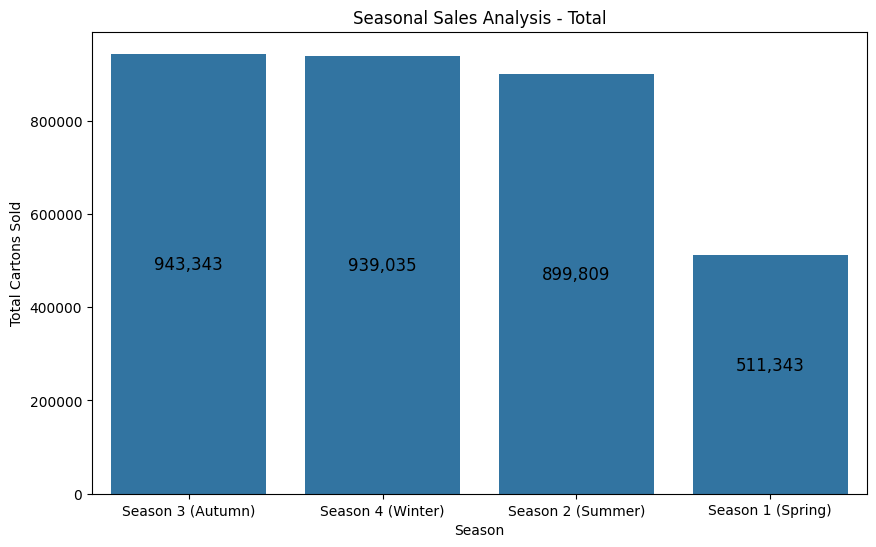

In [ ]:
#Seasonal Sales Analysis - Plot
SeasonalSales = Data.groupby('Season')['Cartons'].sum().reset_index()
SeasonalSales = SeasonalSales.sort_values(by='Cartons', ascending=False)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Season', y='Cartons', data=SeasonalSales)

#Add text on top of each bar
for bar in ax.patches:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() / 2,
             f"{int(bar.get_height()):,}",
             ha='center', va='bottom', fontsize=12)

#Titles and labels
plt.title('Seasonal Sales Analysis - Total')
plt.xlabel('Season')
plt.ylabel('Total Cartons Sold')
plt.show()

<ipython-input-9-1950772f5603>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=SeasonalSales, x="Season", y="Cartons", hue="Year", estimator="sum", ci=None)


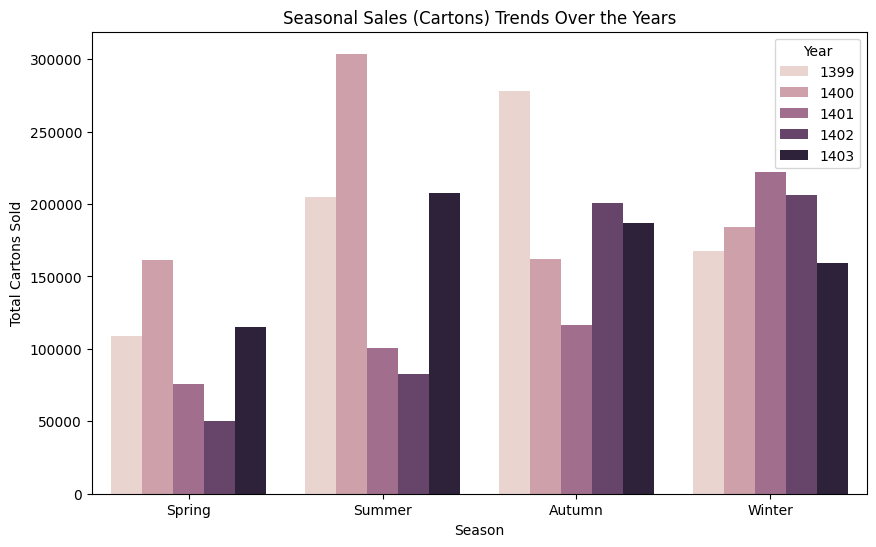

In [ ]:
#Seasonal Sales Trends Over the Years

SeasonalSales = Data.groupby(['Year', 'MonthNumeric'])['Cartons'].sum().reset_index()
SeasonalSales["Season"] = SeasonalSales["MonthNumeric"].apply(lambda x:
    "Spring" if x in [1, 2, 3] else
    "Summer" if x in [4, 5, 6] else
    "Autumn" if x in [7, 8, 9] else
    "Winter"
)

plt.figure(figsize=(10, 6))
sns.barplot(data=SeasonalSales, x="Season", y="Cartons", hue="Year", estimator="sum", ci=None)
plt.title("Seasonal Sales (Cartons) Trends Over the Years")
plt.xlabel("Season")
plt.ylabel("Total Cartons Sold")
plt.legend(title="Year")
plt.show()

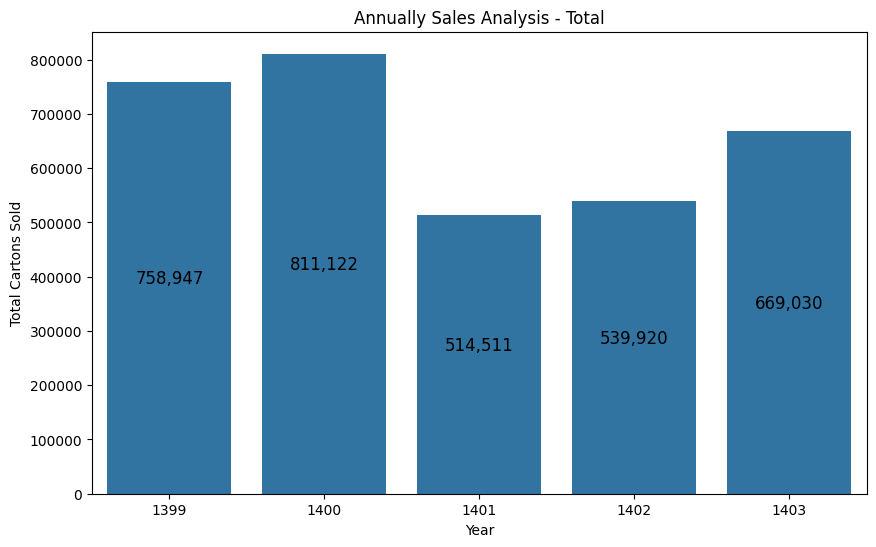

In [ ]:
#Annually Sales Analysis - Plot
AnnuallySales = Data.groupby('Year')['Cartons'].sum().reset_index()
AnnuallySales = AnnuallySales.sort_values(by='Cartons', ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Year', y='Cartons', data=AnnuallySales)

#Add text on top of each bar
for bar in ax.patches:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() / 2,
             f"{int(bar.get_height()):,}",
             ha='center', va='bottom', fontsize=12)

#Titles and labels
plt.title('Annually Sales Analysis - Total')
plt.xlabel('Year')
plt.ylabel('Total Cartons Sold')
plt.show()

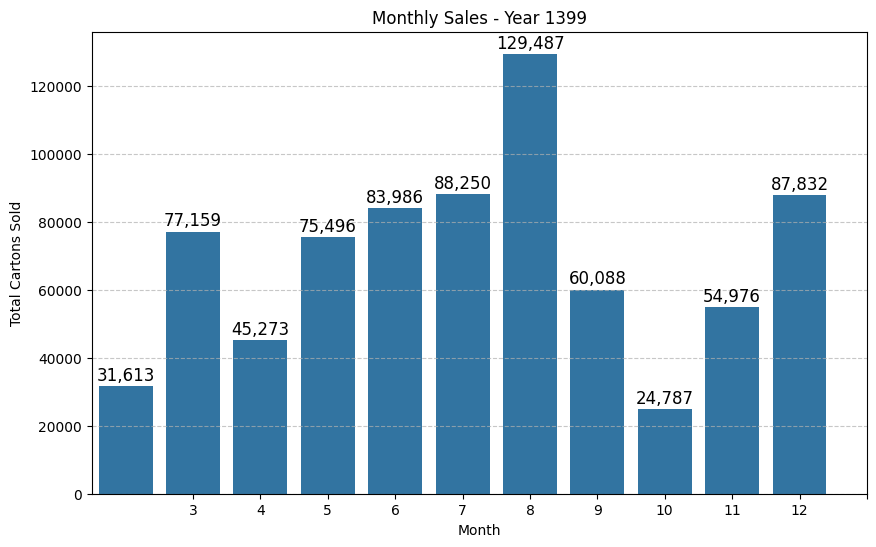

In [ ]:
#Monthly Sales 1399

#Filter data for the specific year
specific_year = 1399
MonthlySales = Data[Data["Year"] == specific_year].groupby("MonthNumeric")["Cartons"].sum().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x="MonthNumeric", y="Cartons", data=MonthlySales, order=sorted(MonthlySales["MonthNumeric"]))

#Add labels on top of each bar
for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 500,  #Adjust height
        f"{int(bar.get_height()):,}",  #Format with commas
        ha="center", va="bottom", fontsize=12)

plt.title(f"Monthly Sales - Year {specific_year}")
plt.xlabel("Month")
plt.ylabel("Total Cartons Sold")
plt.xticks(range(1, 12))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

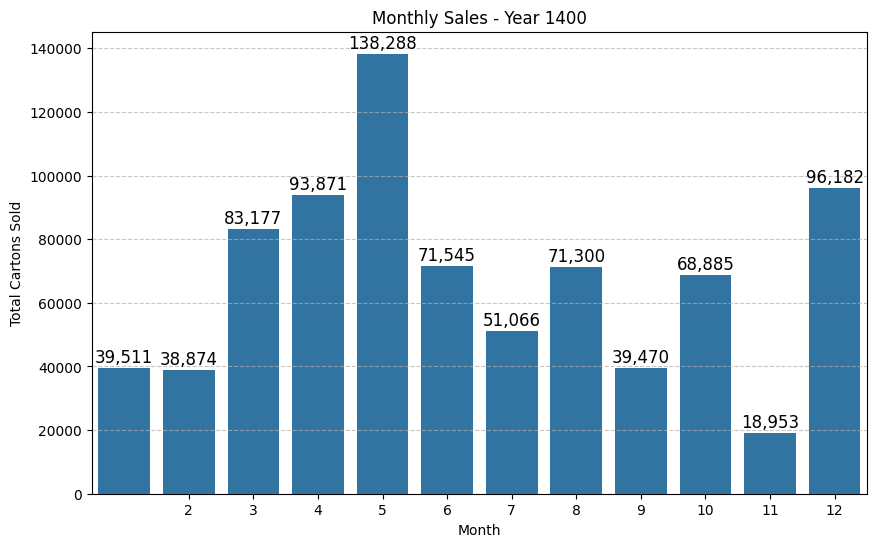

In [ ]:
#Monthly Sales 1400

#Filter data for the specific year
specific_year = 1400
MonthlySales = Data[Data["Year"] == specific_year].groupby("MonthNumeric")["Cartons"].sum().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x="MonthNumeric", y="Cartons", data=MonthlySales, order=sorted(MonthlySales["MonthNumeric"]))

#Add labels on top of each bar
for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 500,  #Adjust height
        f"{int(bar.get_height()):,}",  #Format with commas
        ha="center", va="bottom", fontsize=12)

plt.title(f"Monthly Sales - Year {specific_year}")
plt.xlabel("Month")
plt.ylabel("Total Cartons Sold")
plt.xticks(range(1, 12))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

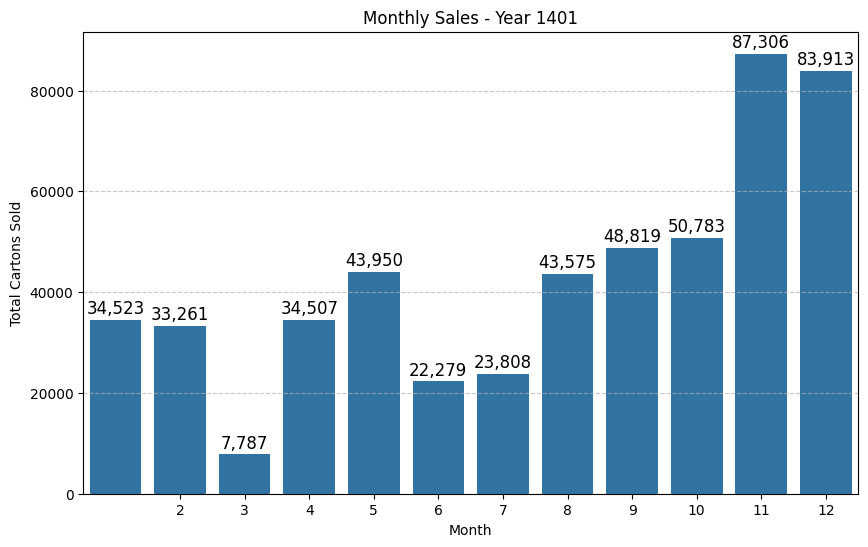

In [ ]:
#Monthly Sales 1401

#Filter data for the specific year
specific_year = 1401
MonthlySales = Data[Data["Year"] == specific_year].groupby("MonthNumeric")["Cartons"].sum().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x="MonthNumeric", y="Cartons", data=MonthlySales, order=sorted(MonthlySales["MonthNumeric"]))

#Add labels on top of each bar
for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 500,  #Adjust height
        f"{int(bar.get_height()):,}",  #Format with commas
        ha="center", va="bottom", fontsize=12)

plt.title(f"Monthly Sales - Year {specific_year}")
plt.xlabel("Month")
plt.ylabel("Total Cartons Sold")
plt.xticks(range(1, 12))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

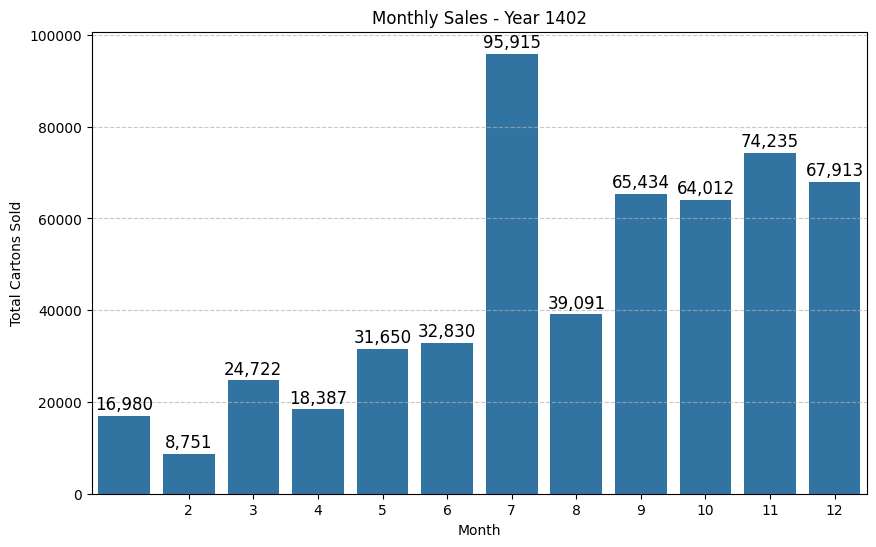

In [ ]:
#Monthly Sales 1402

#Filter data for the specific year
specific_year = 1402
MonthlySales = Data[Data["Year"] == specific_year].groupby("MonthNumeric")["Cartons"].sum().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x="MonthNumeric", y="Cartons", data=MonthlySales, order=sorted(MonthlySales["MonthNumeric"]))

#Add labels on top of each bar
for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 500,  #Adjust height
        f"{int(bar.get_height()):,}",  #Format with commas
        ha="center", va="bottom", fontsize=12)

plt.title(f"Monthly Sales - Year {specific_year}")
plt.xlabel("Month")
plt.ylabel("Total Cartons Sold")
plt.xticks(range(1, 12))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

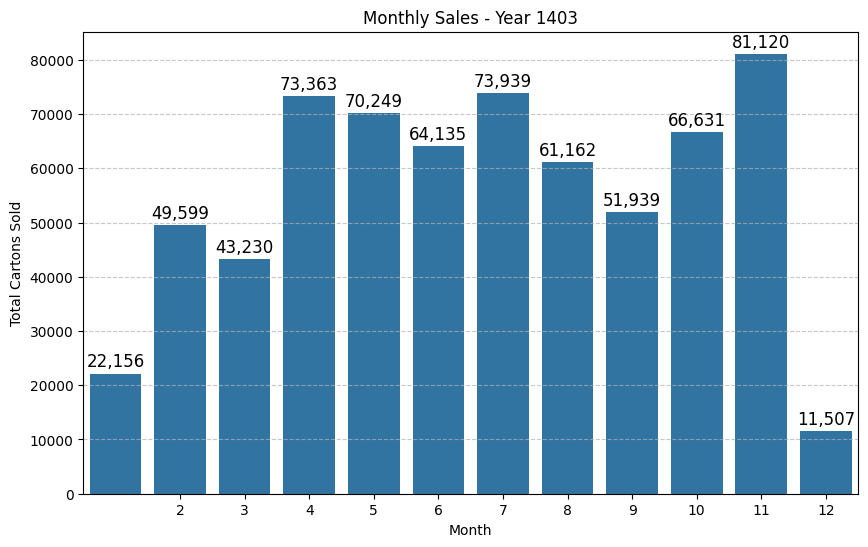

In [ ]:
#Monthly Sales 1403

#Filter data for the specific year
specific_year = 1403
MonthlySales = Data[Data["Year"] == specific_year].groupby("MonthNumeric")["Cartons"].sum().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x="MonthNumeric", y="Cartons", data=MonthlySales, order=sorted(MonthlySales["MonthNumeric"]))

#Add labels on top of each bar
for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 500,  #Adjust height
        f"{int(bar.get_height()):,}",  #Format with commas
        ha="center", va="bottom", fontsize=12)

plt.title(f"Monthly Sales - Year {specific_year}")
plt.xlabel("Month")
plt.ylabel("Total Cartons Sold")
plt.xticks(range(1, 12))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [ ]:
#Top Stores (Annually)

YearlyTopStores = Data.groupby(['StoreName', 'Year'])['Cartons'].sum().reset_index()
YearlyTopStores = YearlyTopStores.sort_values(by='Cartons', ascending=False)
YearlyTopStores["Cartons"] = YearlyTopStores["Cartons"].apply(lambda x: f"{x:,}")
TopStoresByYear = YearlyTopStores.groupby('Year').head(10)

Years = [1399, 1400, 1401, 1402, 1403, 1404]

for year in Years:
  print(TopStoresByYear[TopStoresByYear['Year'] == year].head(10))
  print('\n')

                           StoreName  Year Cartons
365         فروشگاه افق کوروش فلاحت4  1399  43,066
360        فروشگاه افق کوروش فلاحت 5  1399  35,099
328          فروشگاه افق کوروش اهواز  1399  34,527
465  فروشگاه اورست مدرن پارس(جانبو2)  1399  32,553
660        فروشگاه ديان گستر پارسيان  1399  31,891
460  فروشگاه اورست مدرن پارس(جانبو1)  1399  26,877
354         فروشگاه افق کوروش صفادشت  1399  24,949
370         فروشگاه افق کوروش فلاحت6  1399  23,809
438    فروشگاه اورست مدرن پارس قزوين  1399  21,226
469             فروشگاه اوشانک تهران  1399  20,822


                           StoreName  Year Cartons
361        فروشگاه افق کوروش فلاحت 5  1400  34,440
366         فروشگاه افق کوروش فلاحت4  1400  32,428
466  فروشگاه اورست مدرن پارس(جانبو2)  1400  29,365
355         فروشگاه افق کوروش صفادشت  1400  25,261
378         فروشگاه افق کوروش مرودشت  1400  23,840
470             فروشگاه اوشانک تهران  1400  23,503
461  فروشگاه اورست مدرن پارس(جانبو1)  1400  22,577
661        فروشگاه ديان گستر 

In [ ]:
#Top 20 and Low Perform Stores (5 Years)

TopStores = Data.groupby('StoreName')['Cartons'].sum().reset_index()
TopStores = TopStores.sort_values(by='Cartons', ascending=False)
TopStores["Cartons"] = TopStores["Cartons"].apply(lambda x: f"{x:,}")

print(TopStores[['StoreName', 'Cartons']].head(20))
print('\n')

LowPerformStores = Data.groupby('StoreName')['Cartons'].sum().reset_index()
LowPerformStores = LowPerformStores.sort_values(by='Cartons', ascending=True)
LowPerformStores["Cartons"] = LowPerformStores["Cartons"].apply(lambda x: f"{x:,}")

print(LowPerformStores[['StoreName', 'Cartons']].head(20))

                               StoreName  Cartons
182             فروشگاه افق کوروش فلاحت4  177,007
181            فروشگاه افق کوروش فلاحت 5  152,229
205      فروشگاه اورست مدرن پارس(جانبو1)  149,992
179             فروشگاه افق کوروش صفادشت  107,899
207                 فروشگاه اوشانک تهران  103,061
206      فروشگاه اورست مدرن پارس(جانبو2)   75,348
186             فروشگاه افق کوروش مرودشت   68,026
191         فروشگاه افق کوروش کرمانشاه 2   66,812
200        فروشگاه اورست مدرن پارس قزوين   64,244
172            فروشگاه افق کوروش اهواز 2   63,568
198       فروشگاه اورست مدرن پارس شهريار   61,043
208                   فروشگاه اوشانک رشت   57,825
176                فروشگاه افق کوروش رشت   57,592
187               فروشگاه افق کوروش مشهد   53,207
776                      هايپر استار ارم   52,264
278            فروشگاه ديان گستر پارسيان   51,311
678          فروشگاه نجم خاورميانه تهران   49,853
11   انبار مرکزي فروشگاه هاي فاميلي مدرن   48,408
171              فروشگاه افق کوروش اهواز   47,350


In [ ]:
#Portion of annual sales for each of the top 10 stores in each year

AnnuallySales = Data.groupby('Year')['Cartons'].sum().reset_index()
AnnuallySales = AnnuallySales.sort_values(by='Cartons', ascending=False)

YearlyTopStores = Data.groupby(['StoreName', 'Year'])['Cartons'].sum().reset_index()
YearlyTopStores = YearlyTopStores.sort_values(by=['Year', 'Cartons'], ascending=[True, False])
TopStoresByYear = YearlyTopStores.groupby('Year').head(10)

#Calculate and print the portion of annual sales
for year in AnnuallySales['Year'].unique():
    TotalSalesYear = AnnuallySales.loc[AnnuallySales['Year'] == year, 'Cartons'].values[0]
    TopStoresYear = TopStoresByYear[TopStoresByYear['Year'] == year]

    print(f"Top Stores for Year {year} and their Portion of Annual Sales:\n")
    for index, row in TopStoresYear.iterrows():
        StoreName = row['StoreName']
        StoreSales = row['Cartons']
        portion = (StoreSales / TotalSalesYear) * 100
        print(f"{StoreName}: {StoreSales:,} cartons ({portion:.2f}%)")
    print("\n")

Top Stores for Year 1400 and their Portion of Annual Sales:

فروشگاه افق کوروش فلاحت 5: 34,440 cartons (4.25%)
فروشگاه افق کوروش فلاحت4: 32,428 cartons (4.00%)
فروشگاه اورست مدرن پارس(جانبو2): 29,365 cartons (3.62%)
فروشگاه افق کوروش صفادشت: 25,261 cartons (3.11%)
فروشگاه افق کوروش مرودشت: 23,840 cartons (2.94%)
فروشگاه اوشانک تهران: 23,503 cartons (2.90%)
فروشگاه اورست مدرن پارس(جانبو1): 22,577 cartons (2.78%)
فروشگاه ديان گستر پارسيان: 19,420 cartons (2.39%)
فروشگاه اورست مدرن پارس قزوين: 17,691 cartons (2.18%)
فروشگاه افق کوروش مشهد: 17,124 cartons (2.11%)


Top Stores for Year 1399 and their Portion of Annual Sales:

فروشگاه افق کوروش فلاحت4: 43,066 cartons (5.67%)
فروشگاه افق کوروش فلاحت 5: 35,099 cartons (4.62%)
فروشگاه افق کوروش اهواز: 34,527 cartons (4.55%)
فروشگاه اورست مدرن پارس(جانبو2): 32,553 cartons (4.29%)
فروشگاه ديان گستر پارسيان: 31,891 cartons (4.20%)
فروشگاه اورست مدرن پارس(جانبو1): 26,877 cartons (3.54%)
فروشگاه افق کوروش صفادشت: 24,949 cartons (3.29%)
فروشگاه افق ک

In [ ]:
#Top 20 and Low Perform Chain Stores (5 Years)

TopChainStores = Data.groupby('CustomerName')['Cartons'].sum().reset_index()
TopChainStores = TopChainStores.sort_values(by='Cartons', ascending=False)
TopChainStores["Cartons"] = TopChainStores["Cartons"].apply(lambda x: f"{x:,}")

print(TopChainStores[['CustomerName', 'Cartons']].head(20))
print('\n')

LowPerformChainStores = Data.groupby('CustomerName')['Cartons'].sum().reset_index()
LowPerformChainStores = LowPerformChainStores.sort_values(by='Cartons', ascending=True)
LowPerformChainStores["Cartons"] = LowPerformChainStores["Cartons"].apply(lambda x: f"{x:,}")

print(LowPerformChainStores[['CustomerName', 'Cartons']].head(20))

                           CustomerName    Cartons
109         فروشگاه زنجيره اي افق کوروش  1,140,185
110   فروشگاه زنجيره اي اورست مدرن پارس    530,966
73         شرکت هايپر مارکتهاي ماف پارس    258,670
111            فروشگاه زنجيره اي اوشانک    212,893
115              فروشگاه زنجيره اي رفاه    191,854
57              شرکت خدمات کالاي شهروند    179,259
53   شرکت بازرگاني سامان انديشان امرتات    139,317
116       فروشگاه زنجيره اي ستاره طلايي     97,488
117       فروشگاه زنجيره اي سرزمين خريد     76,361
122     فروشگاه زنجيره اي نجم خاورميانه     66,148
120       فروشگاه زنجيره اي فاميلي مدرن     62,649
114  فروشگاه زنجيره اي ديان گسترپارسيان     62,175
72                شرکت نوآوران فن آوازه     29,268
108              فروشگاه زنجيره اي اتکا     28,469
118               فروشگاه زنجيره اي سپه     23,045
125  فروشگاه زنجيره اي گندم طلايي کوروش     22,370
63                      شرکت سلام بازار     19,984
107  فروشگاه زنجيره اي آروين بازار پارس     18,491
47                شرکت آتيه فرز

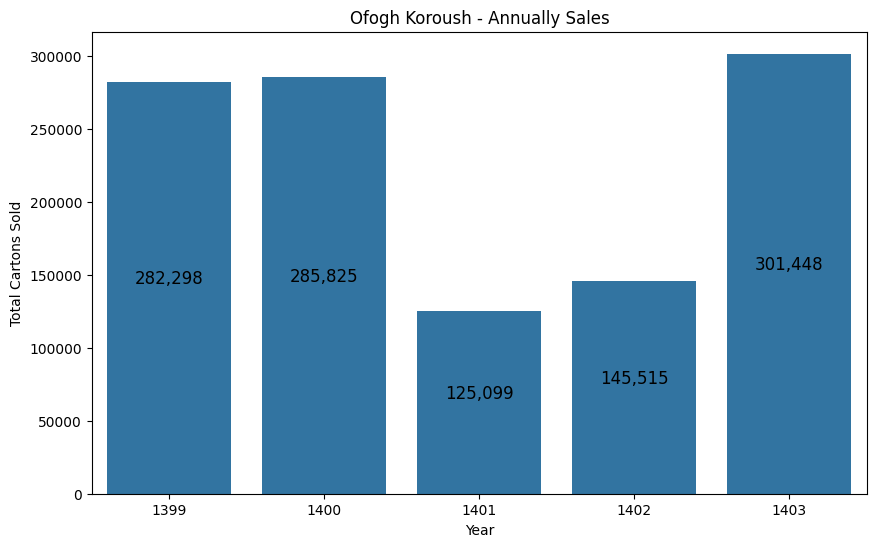

In [ ]:
#First ranked chain store performance in 5 years

#Filter data for the specific CustomerName first
AnnuallySales = Data[Data['CustomerName'] == 'فروشگاه زنجيره اي افق کوروش'].groupby('Year')['Cartons'].sum().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Year', y='Cartons', data=AnnuallySales)

#Add text on top of each bar
for bar in ax.patches:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() / 2,
             f"{int(bar.get_height()):,}",
             ha='center', va='bottom', fontsize=12)

#Titles and labels
plt.title('Ofogh Koroush - Annually Sales')
plt.xlabel('Year')
plt.ylabel('Total Cartons Sold')
plt.show()

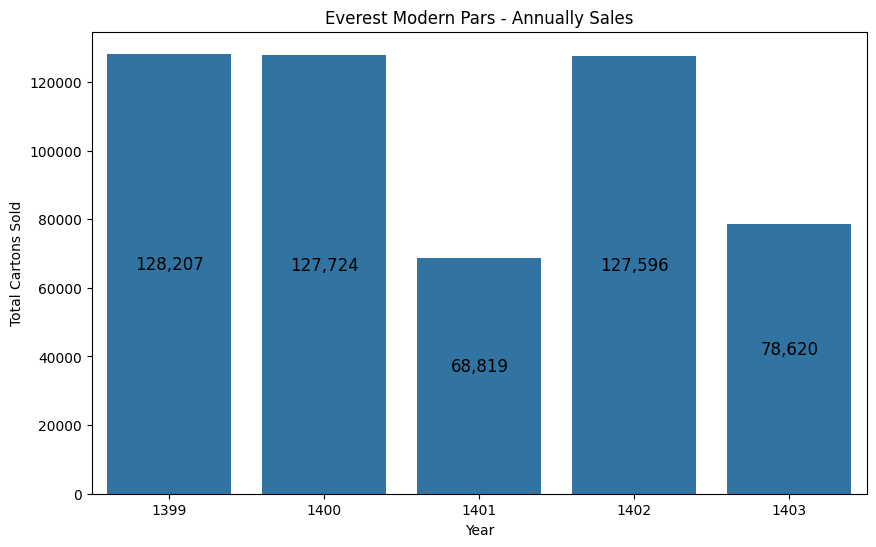

In [ ]:
#Second ranked chain store performance in 5 years

#Filter data for the specific CustomerName first
AnnuallySales = Data[Data['CustomerName'] == 'فروشگاه زنجيره اي اورست مدرن پارس'].groupby('Year')['Cartons'].sum().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Year', y='Cartons', data=AnnuallySales)

#Add text on top of each bar
for bar in ax.patches:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() / 2,
             f"{int(bar.get_height()):,}",
             ha='center', va='bottom', fontsize=12)

#Titles and labels
plt.title('Everest Modern Pars - Annually Sales')
plt.xlabel('Year')
plt.ylabel('Total Cartons Sold')
plt.show()

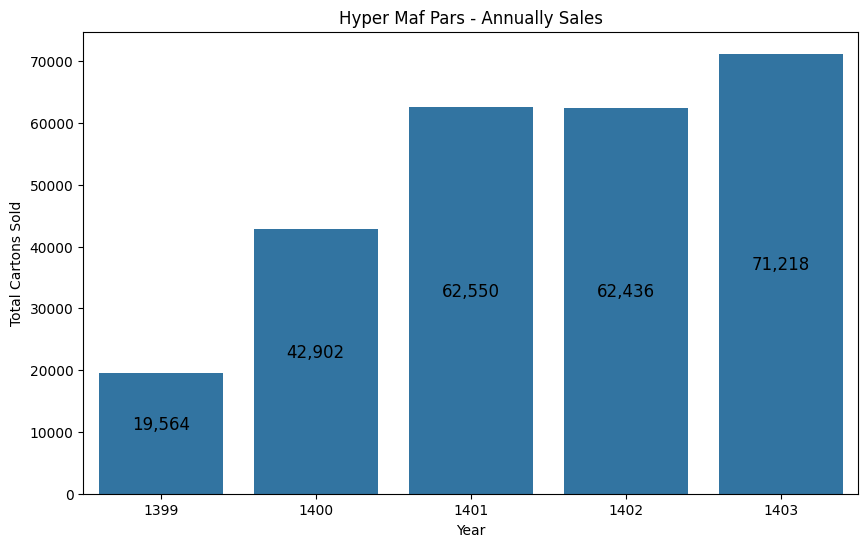

In [ ]:
#Third ranked chain store performance in 5 years

#Filter data for the specific CustomerName first
AnnuallySales = Data[Data['CustomerName'] == 'شرکت هايپر مارکتهاي ماف پارس'].groupby('Year')['Cartons'].sum().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Year', y='Cartons', data=AnnuallySales)

#Add text on top of each bar
for bar in ax.patches:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() / 2,
             f"{int(bar.get_height()):,}",
             ha='center', va='bottom', fontsize=12)

#Titles and labels
plt.title('Hyper Maf Pars - Annually Sales')
plt.xlabel('Year')
plt.ylabel('Total Cartons Sold')
plt.show()

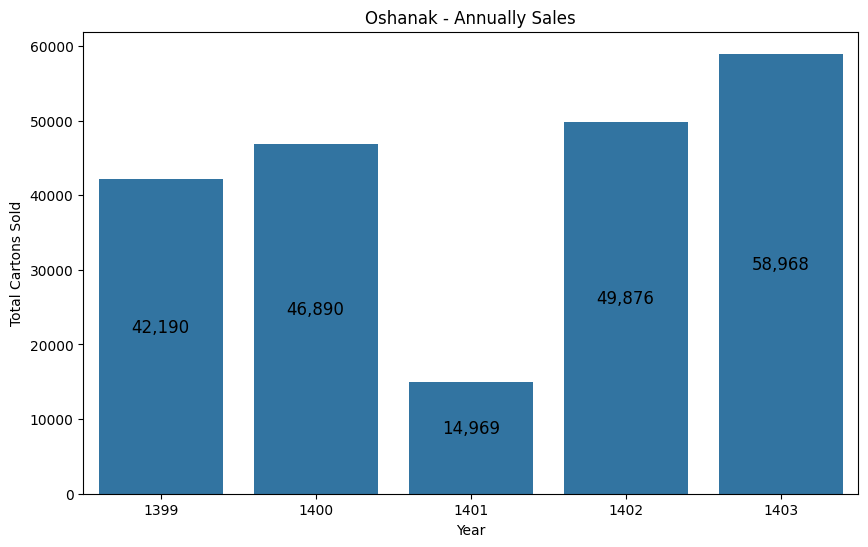

In [ ]:
#Fourth ranked chain store performance in 5 years

#Filter data for the specific CustomerName first
AnnuallySales = Data[Data['CustomerName'] == 'فروشگاه زنجيره اي اوشانک'].groupby('Year')['Cartons'].sum().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Year', y='Cartons', data=AnnuallySales)

#Add text on top of each bar
for bar in ax.patches:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() / 2,
             f"{int(bar.get_height()):,}",
             ha='center', va='bottom', fontsize=12)

#Titles and labels
plt.title('Oshanak - Annually Sales')
plt.xlabel('Year')
plt.ylabel('Total Cartons Sold')
plt.show()

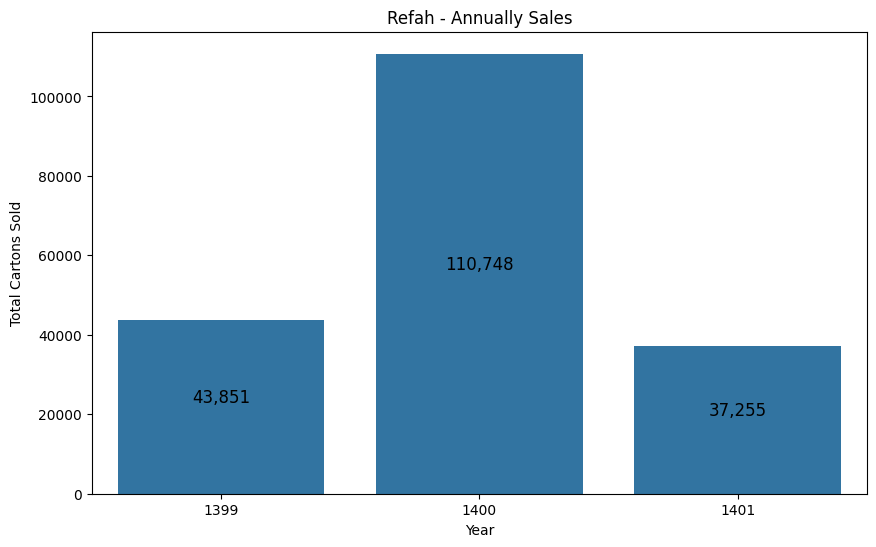

In [ ]:
#Fifth ranked chain store performance in 5 years

#Filter data for the specific CustomerName first
AnnuallySales = Data[Data['CustomerName'] == 'فروشگاه زنجيره اي رفاه'].groupby('Year')['Cartons'].sum().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Year', y='Cartons', data=AnnuallySales)

#Add text on top of each bar
for bar in ax.patches:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() / 2,
             f"{int(bar.get_height()):,}",
             ha='center', va='bottom', fontsize=12)

#Titles and labels
plt.title('Refah - Annually Sales')
plt.xlabel('Year')
plt.ylabel('Total Cartons Sold')
plt.show()

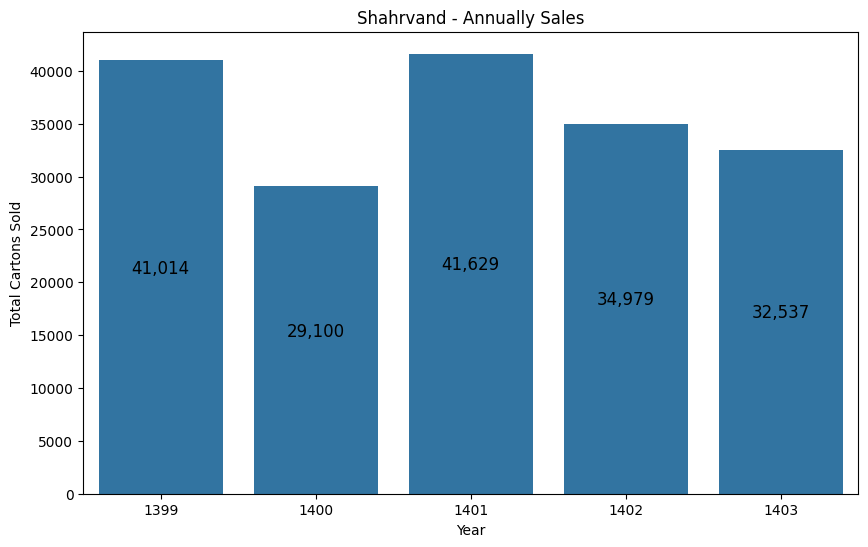

In [ ]:
#Sixth ranked chain store performance in 5 years

#Filter data for the specific CustomerName first
AnnuallySales = Data[Data['CustomerName'] == 'شرکت خدمات کالاي شهروند'].groupby('Year')['Cartons'].sum().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Year', y='Cartons', data=AnnuallySales)

#Add text on top of each bar
for bar in ax.patches:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() / 2,
             f"{int(bar.get_height()):,}",
             ha='center', va='bottom', fontsize=12)

#Titles and labels
plt.title('Shahrvand - Annually Sales')
plt.xlabel('Year')
plt.ylabel('Total Cartons Sold')
plt.show()

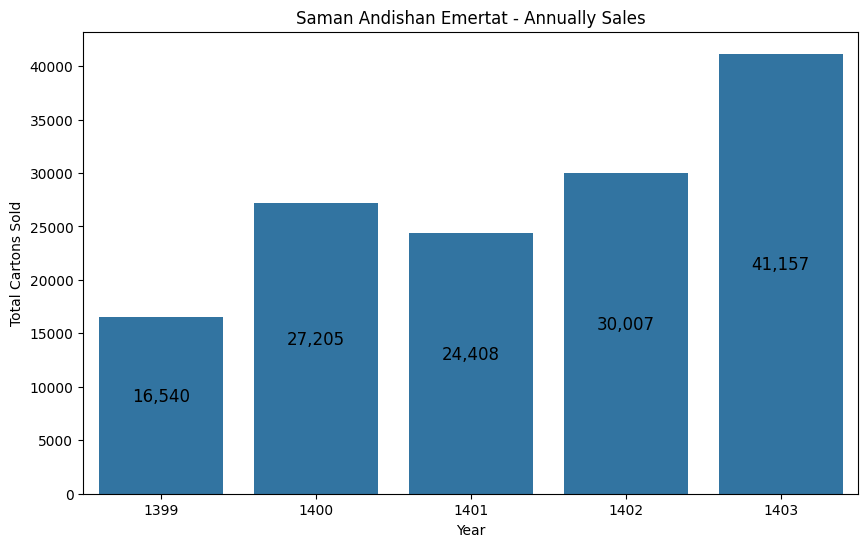

In [ ]:
#Seventh ranked chain store performance in 5 years

#Filter data for the specific CustomerName first
AnnuallySales = Data[Data['CustomerName'] == 'شرکت بازرگاني سامان انديشان امرتات'].groupby('Year')['Cartons'].sum().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Year', y='Cartons', data=AnnuallySales)

#Add text on top of each bar
for bar in ax.patches:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() / 2,
             f"{int(bar.get_height()):,}",
             ha='center', va='bottom', fontsize=12)

#Titles and labels
plt.title('Saman Andishan Emertat - Annually Sales')
plt.xlabel('Year')
plt.ylabel('Total Cartons Sold')
plt.show()

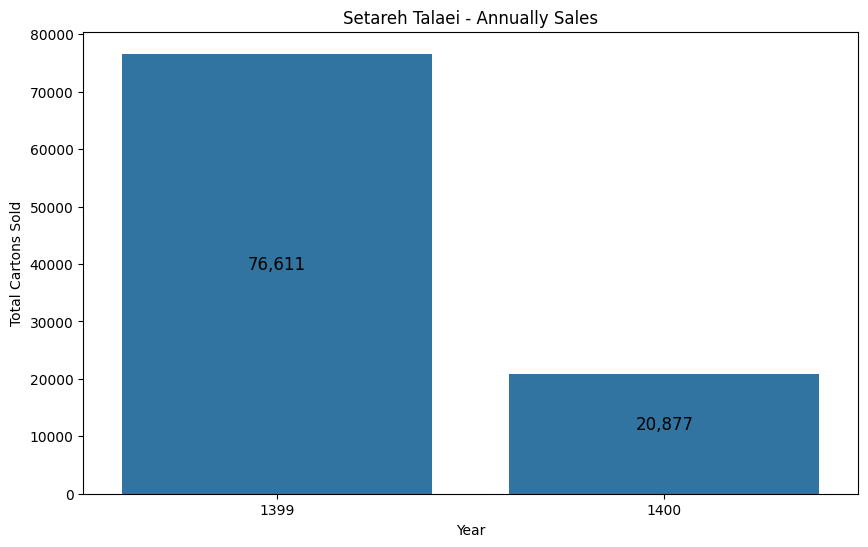

In [ ]:
#Eighths ranked chain store performance in 5 years

#Filter data for the specific CustomerName first
AnnuallySales = Data[Data['CustomerName'] == 'فروشگاه زنجيره اي ستاره طلايي'].groupby('Year')['Cartons'].sum().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Year', y='Cartons', data=AnnuallySales)

#Add text on top of each bar
for bar in ax.patches:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() / 2,
             f"{int(bar.get_height()):,}",
             ha='center', va='bottom', fontsize=12)

#Titles and labels
plt.title('Setareh Talaei - Annually Sales')
plt.xlabel('Year')
plt.ylabel('Total Cartons Sold')
plt.show()

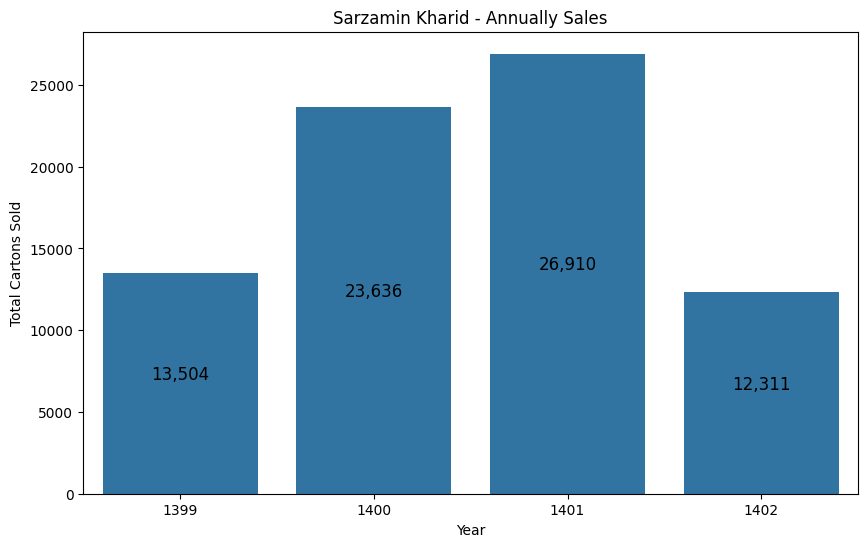

In [ ]:
#Ninth ranked chain store performance in 5 years

#Filter data for the specific CustomerName first
AnnuallySales = Data[Data['CustomerName'] == 'فروشگاه زنجيره اي سرزمين خريد'].groupby('Year')['Cartons'].sum().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Year', y='Cartons', data=AnnuallySales)

#Add text on top of each bar
for bar in ax.patches:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() / 2,
             f"{int(bar.get_height()):,}",
             ha='center', va='bottom', fontsize=12)

#Titles and labels
plt.title('Sarzamin Kharid - Annually Sales')
plt.xlabel('Year')
plt.ylabel('Total Cartons Sold')
plt.show()

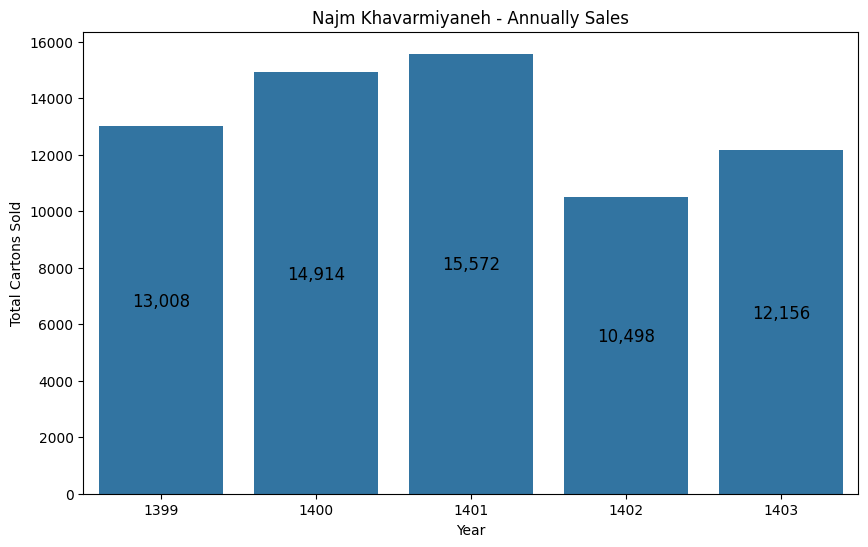

In [ ]:
#Tenths ranked chain store performance in 5 years

#Filter data for the specific CustomerName first
AnnuallySales = Data[Data['CustomerName'] == 'فروشگاه زنجيره اي نجم خاورميانه'].groupby('Year')['Cartons'].sum().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Year', y='Cartons', data=AnnuallySales)

#Add text on top of each bar
for bar in ax.patches:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() / 2,
             f"{int(bar.get_height()):,}",
             ha='center', va='bottom', fontsize=12)

#Titles and labels
plt.title('Najm Khavarmiyaneh - Annually Sales')
plt.xlabel('Year')
plt.ylabel('Total Cartons Sold')
plt.show()

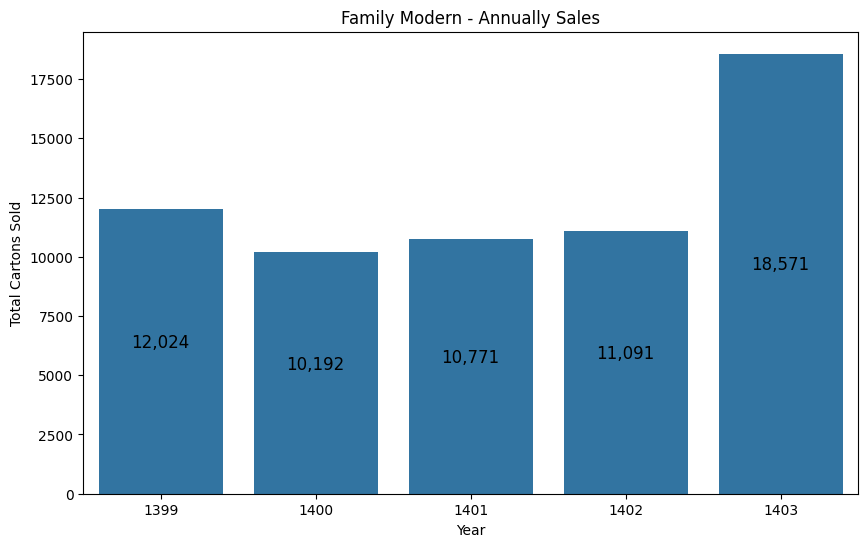

In [ ]:
#Eleventh ranked chain store performance in 5 years

#Filter data for the specific CustomerName first
AnnuallySales = Data[Data['CustomerName'] == 'فروشگاه زنجيره اي فاميلي مدرن'].groupby('Year')['Cartons'].sum().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Year', y='Cartons', data=AnnuallySales)

#Add text on top of each bar
for bar in ax.patches:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() / 2,
             f"{int(bar.get_height()):,}",
             ha='center', va='bottom', fontsize=12)

#Titles and labels
plt.title('Family Modern - Annually Sales')
plt.xlabel('Year')
plt.ylabel('Total Cartons Sold')
plt.show()

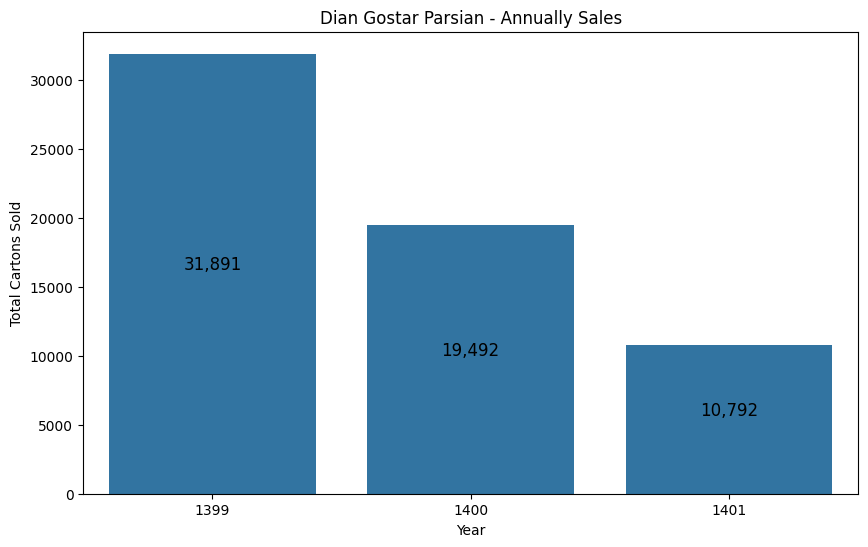

In [ ]:
#Twelfth ranked chain store performance in 5 years

#Filter data for the specific CustomerName first
AnnuallySales = Data[Data['CustomerName'] == 'فروشگاه زنجيره اي ديان گسترپارسيان'].groupby('Year')['Cartons'].sum().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Year', y='Cartons', data=AnnuallySales)

#Add text on top of each bar
for bar in ax.patches:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() / 2,
             f"{int(bar.get_height()):,}",
             ha='center', va='bottom', fontsize=12)

#Titles and labels
plt.title('Dian Gostar Parsian - Annually Sales')
plt.xlabel('Year')
plt.ylabel('Total Cartons Sold')
plt.show()

In [4]:
#Ofogh Retail Store Count

years = [1399, 1400, 1401, 1402, 1403]
store_counts = []

for year in years:
    filtered_data = Data[(Data['CustomerName'] == 'فروشگاه زنجيره اي افق کوروش') & (Data['Year'] == year)]
    unique_store_names = filtered_data['StoreName'].nunique()
    store_counts.append({'Year': year, 'StoreCount': unique_store_names})

store_count_table = pd.DataFrame(store_counts)
print(store_count_table)

   Year  StoreCount
0  1399          19
1  1400          20
2  1401          19
3  1402          18
4  1403          20


In [5]:
#Everest Modern Pars Retail Store Count

years = [1399, 1400, 1401, 1402, 1403]
store_counts = []

for year in years:
    filtered_data = Data[(Data['CustomerName'] == 'فروشگاه زنجيره اي اورست مدرن پارس') & (Data['Year'] == year)]
    unique_store_names = filtered_data['StoreName'].nunique()
    store_counts.append({'Year': year, 'StoreCount': unique_store_names})

store_count_table = pd.DataFrame(store_counts)
print(store_count_table)

   Year  StoreCount
0  1399          11
1  1400          13
2  1401          14
3  1402          14
4  1403          12


In [6]:
#Hyper Maf Pars Retail Store Count

years = [1399, 1400, 1401, 1402, 1403]
store_counts = []

for year in years:
    filtered_data = Data[(Data['CustomerName'] == 'شرکت هايپر مارکتهاي ماف پارس') & (Data['Year'] == year)]
    unique_store_names = filtered_data['StoreName'].nunique()
    store_counts.append({'Year': year, 'StoreCount': unique_store_names})

store_count_table = pd.DataFrame(store_counts)
print(store_count_table)

   Year  StoreCount
0  1399          24
1  1400          30
2  1401          33
3  1402          36
4  1403          35


In [7]:
#Oshanak Retail Store Count

years = [1399, 1400, 1401, 1402, 1403]
store_counts = []

for year in years:
    filtered_data = Data[(Data['CustomerName'] == 'فروشگاه زنجيره اي اوشانک') & (Data['Year'] == year)]
    unique_store_names = filtered_data['StoreName'].nunique()
    store_counts.append({'Year': year, 'StoreCount': unique_store_names})

store_count_table = pd.DataFrame(store_counts)
print(store_count_table)

   Year  StoreCount
0  1399           5
1  1400           5
2  1401           5
3  1402           5
4  1403           5


In [8]:
#Refah Retail Store Count

years = [1399, 1400, 1401, 1402, 1403]
store_counts = []

for year in years:
    filtered_data = Data[(Data['CustomerName'] == 'فروشگاه زنجيره اي رفاه') & (Data['Year'] == year)]
    unique_store_names = filtered_data['StoreName'].nunique()
    store_counts.append({'Year': year, 'StoreCount': unique_store_names})

store_count_table = pd.DataFrame(store_counts)
print(store_count_table)

   Year  StoreCount
0  1399         146
1  1400         227
2  1401         140
3  1402           0
4  1403           0


In [9]:
#Shahrvand Retail Store Count

years = [1399, 1400, 1401, 1402, 1403]
store_counts = []

for year in years:
    filtered_data = Data[(Data['CustomerName'] == 'شرکت خدمات کالاي شهروند') & (Data['Year'] == year)]
    unique_store_names = filtered_data['StoreName'].nunique()
    store_counts.append({'Year': year, 'StoreCount': unique_store_names})

store_count_table = pd.DataFrame(store_counts)
print(store_count_table)

   Year  StoreCount
0  1399          39
1  1400          42
2  1401          44
3  1402          53
4  1403          54


In [10]:
#Saman Andishan Emertat Retail Store Count

years = [1399, 1400, 1401, 1402, 1403]
store_counts = []

for year in years:
    filtered_data = Data[(Data['CustomerName'] == 'شرکت بازرگاني سامان انديشان امرتات') & (Data['Year'] == year)]
    unique_store_names = filtered_data['StoreName'].nunique()
    store_counts.append({'Year': year, 'StoreCount': unique_store_names})

store_count_table = pd.DataFrame(store_counts)
print(store_count_table)

   Year  StoreCount
0  1399          23
1  1400          28
2  1401          31
3  1402          31
4  1403          33


In [16]:
#Setareh Talaei Retail Store Count

years = [1399, 1400, 1401, 1402, 1403]
store_counts = []

for year in years:
    filtered_data = Data[(Data['CustomerName'] == 'فروشگاه زنجيره اي ستاره طلايي') & (Data['Year'] == year)]
    unique_store_names = filtered_data['StoreName'].nunique()
    store_counts.append({'Year': year, 'StoreCount': unique_store_names})

store_count_table = pd.DataFrame(store_counts)
print(store_count_table)

   Year  StoreCount
0  1399           9
1  1400           9
2  1401           0
3  1402           0
4  1403           0


In [12]:
#Sarzamin Kharid Retail Store Count

years = [1399, 1400, 1401, 1402, 1403]
store_counts = []

for year in years:
    filtered_data = Data[(Data['CustomerName'] == 'فروشگاه زنجيره اي سرزمين خريد') & (Data['Year'] == year)]
    unique_store_names = filtered_data['StoreName'].nunique()
    store_counts.append({'Year': year, 'StoreCount': unique_store_names})

store_count_table = pd.DataFrame(store_counts)
print(store_count_table)

   Year  StoreCount
0  1399          10
1  1400          12
2  1401          12
3  1402          13
4  1403           0


In [13]:
#Najm Khavarmiyaneh Retail Store Count

years = [1399, 1400, 1401, 1402, 1403]
store_counts = []

for year in years:
    filtered_data = Data[(Data['CustomerName'] == 'فروشگاه زنجيره اي نجم خاورميانه') & (Data['Year'] == year)]
    unique_store_names = filtered_data['StoreName'].nunique()
    store_counts.append({'Year': year, 'StoreCount': unique_store_names})

store_count_table = pd.DataFrame(store_counts)
print(store_count_table)

   Year  StoreCount
0  1399           2
1  1400           2
2  1401           3
3  1402           3
4  1403           3


In [14]:
#Family Modern Retail Store Count

years = [1399, 1400, 1401, 1402, 1403]
store_counts = []

for year in years:
    filtered_data = Data[(Data['CustomerName'] == 'فروشگاه زنجيره اي فاميلي مدرن') & (Data['Year'] == year)]
    unique_store_names = filtered_data['StoreName'].nunique()
    store_counts.append({'Year': year, 'StoreCount': unique_store_names})

store_count_table = pd.DataFrame(store_counts)
print(store_count_table)

   Year  StoreCount
0  1399          34
1  1400          20
2  1401           1
3  1402           1
4  1403           1


In [15]:
#Dian Gostar Parsian Retail Store Count

years = [1399, 1400, 1401, 1402, 1403]
store_counts = []

for year in years:
    filtered_data = Data[(Data['CustomerName'] == 'فروشگاه زنجيره اي ديان گسترپارسيان') & (Data['Year'] == year)]
    unique_store_names = filtered_data['StoreName'].nunique()
    store_counts.append({'Year': year, 'StoreCount': unique_store_names})

store_count_table = pd.DataFrame(store_counts)
print(store_count_table)

   Year  StoreCount
0  1399           1
1  1400           2
2  1401           1
3  1402           0
4  1403           0


In [ ]:
#Portion of annual sales for each of the top 10 chain stores in each year

AnnuallySales = Data.groupby('Year')['Cartons'].sum().reset_index()
AnnuallySales = AnnuallySales.sort_values(by='Cartons', ascending=False)

#Second part: Calculate and print portion of annual sales for top chain stores
for year in AnnuallySales['Year'].unique():
    TotalSalesYear = AnnuallySales.loc[AnnuallySales['Year'] == year, 'Cartons'].values[0]

    #Filter TopChainStores for the current year and get top 10
    TopStoresYear = Data[Data['Year'] == year].groupby('CustomerName')['Cartons'].sum().reset_index()
    TopStoresYear = TopStoresYear.sort_values(by=['Cartons'], ascending=[False]).head(10)
    TopStoresYear["Cartons"] = TopStoresYear["Cartons"].apply(lambda x: f"{x:,}")

    print(f"Top Chain Stores for Year {year} and their Portion of Annual Sales:\n")
    for index, row in TopStoresYear.iterrows():
        StoreName = row['CustomerName']
        StoreSales = row['Cartons']

        #Convert StoreSales to numeric to do calculation
        StoreSalesNumeric = int(StoreSales.replace(',', ''))
        portion = (StoreSalesNumeric / TotalSalesYear) * 100
        print(f"{StoreName}: {StoreSales} cartons ({portion:.2f}%)")
    print("\n")

Top Chain Stores for Year 1400 and their Portion of Annual Sales:

فروشگاه زنجيره اي افق کوروش: 285,825 cartons (35.24%)
فروشگاه زنجيره اي اورست مدرن پارس: 127,724 cartons (15.75%)
فروشگاه زنجيره اي رفاه: 110,748 cartons (13.65%)
فروشگاه زنجيره اي اوشانک: 46,890 cartons (5.78%)
شرکت هايپر مارکتهاي ماف پارس: 42,902 cartons (5.29%)
شرکت خدمات کالاي شهروند: 29,100 cartons (3.59%)
شرکت بازرگاني سامان انديشان امرتات: 27,205 cartons (3.35%)
فروشگاه زنجيره اي سرزمين خريد: 23,636 cartons (2.91%)
فروشگاه زنجيره اي ستاره طلايي: 20,877 cartons (2.57%)
فروشگاه زنجيره اي ديان گسترپارسيان: 19,492 cartons (2.40%)


Top Chain Stores for Year 1399 and their Portion of Annual Sales:

فروشگاه زنجيره اي افق کوروش: 282,298 cartons (37.20%)
فروشگاه زنجيره اي اورست مدرن پارس: 128,207 cartons (16.89%)
فروشگاه زنجيره اي ستاره طلايي: 76,611 cartons (10.09%)
فروشگاه زنجيره اي رفاه: 43,851 cartons (5.78%)
فروشگاه زنجيره اي اوشانک: 42,190 cartons (5.56%)
شرکت خدمات کالاي شهروند: 41,014 cartons (5.40%)
فروشگاه زنجي

In [ ]:
#Top Product Group (5 Years)

TopProductGroup = Data.groupby('ProductGroup')['Cartons'].sum().reset_index()
TopProductGroup = TopProductGroup.sort_values(by='Cartons', ascending=False)
TopProductGroup["Cartons"] = TopProductGroup["Cartons"].apply(lambda x: f"{x:,}")

print(TopProductGroup[['ProductGroup', 'Cartons']].head())

             ProductGroup    Cartons
0     رب گوجه فرنگي روژين  2,553,490
2                  سس گرم    381,316
1                  سس سرد    175,004
4  کنسرو گوجه فرنگي روژين    108,003
3          کنسرو غيرگوشتي     75,717


In [ ]:
#Product Group (Per Year)

for year in Data['Year'].unique():
    YearlyTopProductGroup = Data[Data['Year'] == year].groupby('ProductGroup')['Cartons'].sum().reset_index()
    YearlyTopProductGroup = YearlyTopProductGroup.sort_values(by='Cartons', ascending=False)
    YearlyTopProductGroup["Cartons"] = YearlyTopProductGroup["Cartons"].apply(lambda x: f"{x:,}")

    print(f"Top Product Groups for Year {year}:\n")
    print(YearlyTopProductGroup[['ProductGroup', 'Cartons']].head())
    print('\n')

Top Product Groups for Year 1399:

             ProductGroup  Cartons
0     رب گوجه فرنگي روژين  533,801
2                  سس گرم  147,430
1                  سس سرد   41,556
3  کنسرو گوجه فرنگي روژين   36,160


Top Product Groups for Year 1400:

             ProductGroup  Cartons
0     رب گوجه فرنگي روژين  570,860
2                  سس گرم  144,340
1                  سس سرد   62,911
4  کنسرو گوجه فرنگي روژين   23,977
3          کنسرو غيرگوشتي    9,034


Top Product Groups for Year 1401:

             ProductGroup  Cartons
0     رب گوجه فرنگي روژين  420,322
2                  سس گرم   34,180
1                  سس سرد   29,424
3          کنسرو غيرگوشتي   17,796
4  کنسرو گوجه فرنگي روژين   12,789


Top Product Groups for Year 1402:

             ProductGroup  Cartons
0     رب گوجه فرنگي روژين  462,282
4  کنسرو گوجه فرنگي روژين   21,335
1                  سس سرد   19,810
3          کنسرو غيرگوشتي   18,650
2                  سس گرم   17,843


Top Product Groups for Year 1403:

            

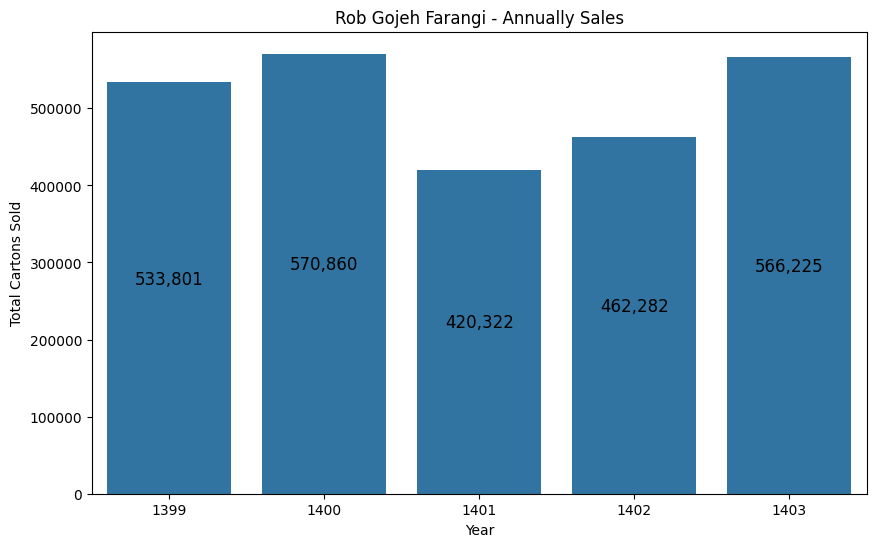

In [ ]:
#First ranked product group performance in 5 years

#Filter data for the specific product group first
AnnuallySales = Data[Data['ProductGroup'] == 'رب گوجه فرنگي روژين'].groupby('Year')['Cartons'].sum().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Year', y='Cartons', data=AnnuallySales)

#Add text on top of each bar
for bar in ax.patches:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() / 2,
             f"{int(bar.get_height()):,}",
             ha='center', va='bottom', fontsize=12)

#Titles and labels
plt.title('Rob Gojeh Farangi - Annually Sales')
plt.xlabel('Year')
plt.ylabel('Total Cartons Sold')
plt.show()

<ipython-input-42-1a85038bd044>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([month_labels[month - 1] for month in monthly_sales['MonthNumeric']])


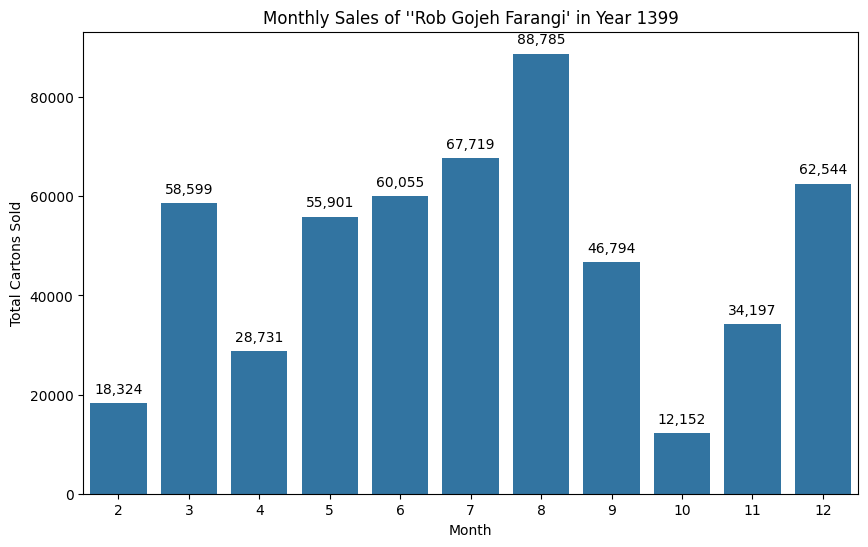

In [42]:
#First ranked product group performance in 1399

#Specify the year
year = 1399

#Filter data for the specific product group and year
product_group_data = Data[(Data['ProductGroup'] == 'رب گوجه فرنگي روژين') & (Data['Year'] == year)]

#Group data by month and sum cartons
monthly_sales = product_group_data.groupby('MonthNumeric')['Cartons'].sum().reset_index()

#Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='MonthNumeric', y='Cartons', data=monthly_sales)
month_labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
ax.set_xticklabels([month_labels[month - 1] for month in monthly_sales['MonthNumeric']])
plt.xlabel("Month")
plt.ylabel("Total Cartons Sold")
plt.title(f"Monthly Sales of ''Rob Gojeh Farangi' in Year {year}")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

<ipython-input-43-29e92aa11a83>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([month_labels[month - 1] for month in monthly_sales['MonthNumeric']])


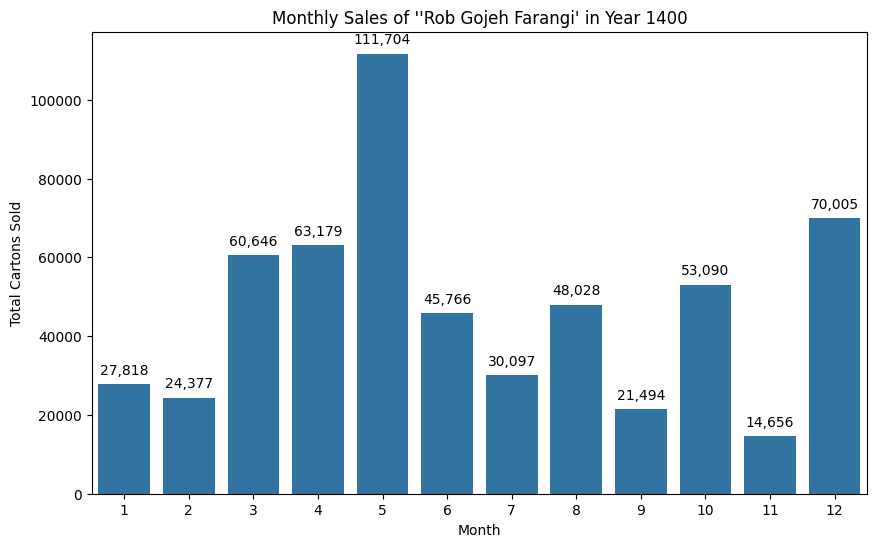

In [43]:
#First ranked product group performance in 1400

#Specify the year
year = 1400

#Filter data for the specific product group and year
product_group_data = Data[(Data['ProductGroup'] == 'رب گوجه فرنگي روژين') & (Data['Year'] == year)]

#Group data by month and sum cartons
monthly_sales = product_group_data.groupby('MonthNumeric')['Cartons'].sum().reset_index()

#Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='MonthNumeric', y='Cartons', data=monthly_sales)
month_labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
ax.set_xticklabels([month_labels[month - 1] for month in monthly_sales['MonthNumeric']])
plt.xlabel("Month")
plt.ylabel("Total Cartons Sold")
plt.title(f"Monthly Sales of ''Rob Gojeh Farangi' in Year {year}")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

<ipython-input-44-614356d15ca6>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([month_labels[month - 1] for month in monthly_sales['MonthNumeric']])


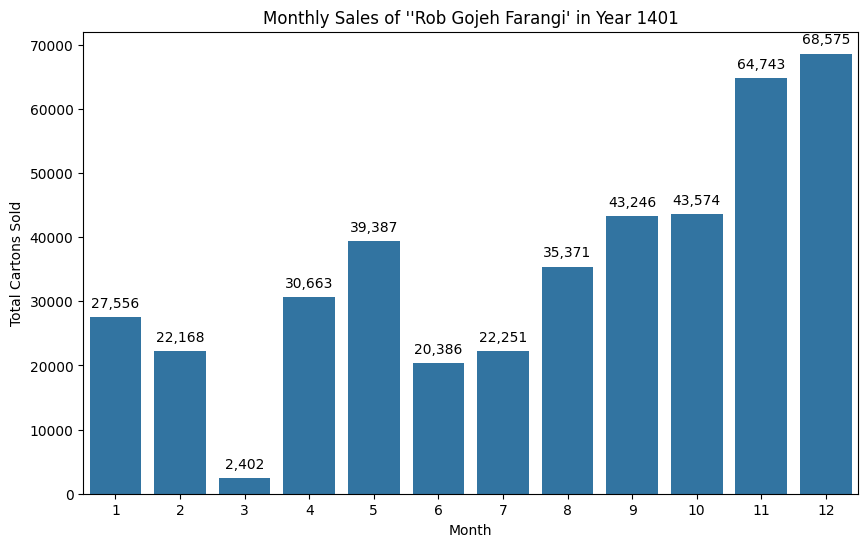

In [44]:
#First ranked product group performance in 1401

#Specify the year
year = 1401

#Filter data for the specific product group and year
product_group_data = Data[(Data['ProductGroup'] == 'رب گوجه فرنگي روژين') & (Data['Year'] == year)]

#Group data by month and sum cartons
monthly_sales = product_group_data.groupby('MonthNumeric')['Cartons'].sum().reset_index()

#Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='MonthNumeric', y='Cartons', data=monthly_sales)
month_labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
ax.set_xticklabels([month_labels[month - 1] for month in monthly_sales['MonthNumeric']])
plt.xlabel("Month")
plt.ylabel("Total Cartons Sold")
plt.title(f"Monthly Sales of ''Rob Gojeh Farangi' in Year {year}")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

<ipython-input-45-616e5fb7919b>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([month_labels[month - 1] for month in monthly_sales['MonthNumeric']])


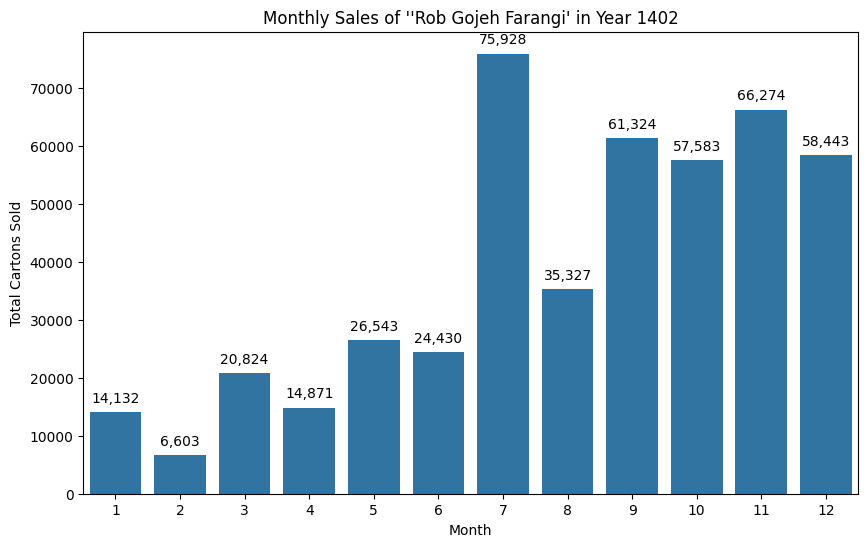

In [45]:
#First ranked product group performance in 1402

#Specify the year
year = 1402

#Filter data for the specific product group and year
product_group_data = Data[(Data['ProductGroup'] == 'رب گوجه فرنگي روژين') & (Data['Year'] == year)]

#Group data by month and sum cartons
monthly_sales = product_group_data.groupby('MonthNumeric')['Cartons'].sum().reset_index()

#Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='MonthNumeric', y='Cartons', data=monthly_sales)
month_labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
ax.set_xticklabels([month_labels[month - 1] for month in monthly_sales['MonthNumeric']])
plt.xlabel("Month")
plt.ylabel("Total Cartons Sold")
plt.title(f"Monthly Sales of ''Rob Gojeh Farangi' in Year {year}")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

<ipython-input-46-f7ee70d452e3>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([month_labels[month - 1] for month in monthly_sales['MonthNumeric']])


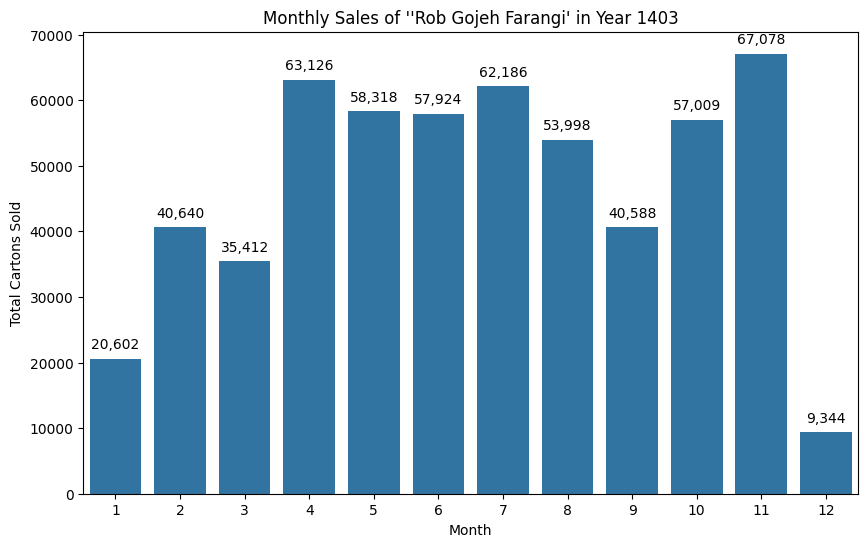

In [46]:
#First ranked product group performance in 1403

#Specify the year
year = 1403

#Filter data for the specific product group and year
product_group_data = Data[(Data['ProductGroup'] == 'رب گوجه فرنگي روژين') & (Data['Year'] == year)]

#Group data by month and sum cartons
monthly_sales = product_group_data.groupby('MonthNumeric')['Cartons'].sum().reset_index()

#Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='MonthNumeric', y='Cartons', data=monthly_sales)
month_labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
ax.set_xticklabels([month_labels[month - 1] for month in monthly_sales['MonthNumeric']])
plt.xlabel("Month")
plt.ylabel("Total Cartons Sold")
plt.title(f"Monthly Sales of ''Rob Gojeh Farangi' in Year {year}")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

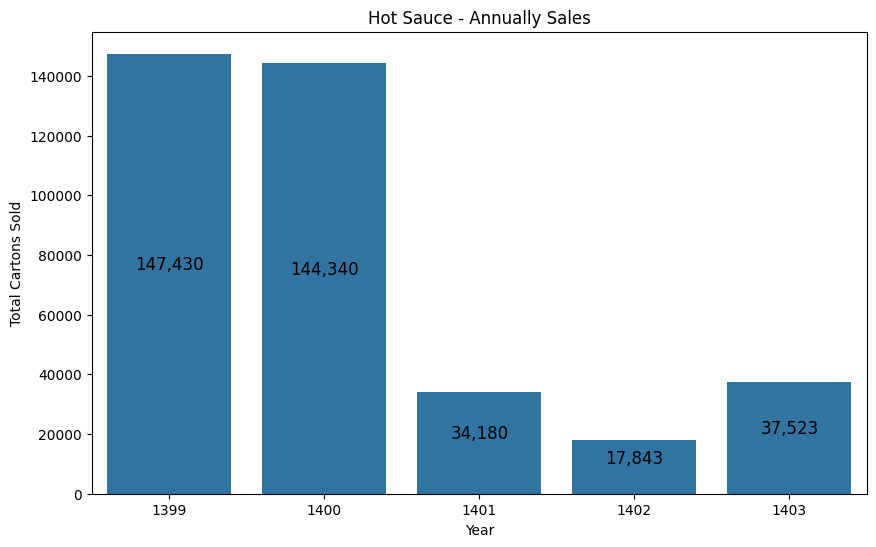

In [ ]:
#Second ranked product group performance in 5 years

#Filter data for the specific product group first
AnnuallySales = Data[Data['ProductGroup'] == 'سس گرم'].groupby('Year')['Cartons'].sum().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Year', y='Cartons', data=AnnuallySales)

#Add text on top of each bar
for bar in ax.patches:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() / 2,
             f"{int(bar.get_height()):,}",
             ha='center', va='bottom', fontsize=12)

#Titles and labels
plt.title('Hot Sauce - Annually Sales')
plt.xlabel('Year')
plt.ylabel('Total Cartons Sold')
plt.show()

<ipython-input-47-11b147015d1c>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([month_labels[month - 1] for month in monthly_sales['MonthNumeric']])


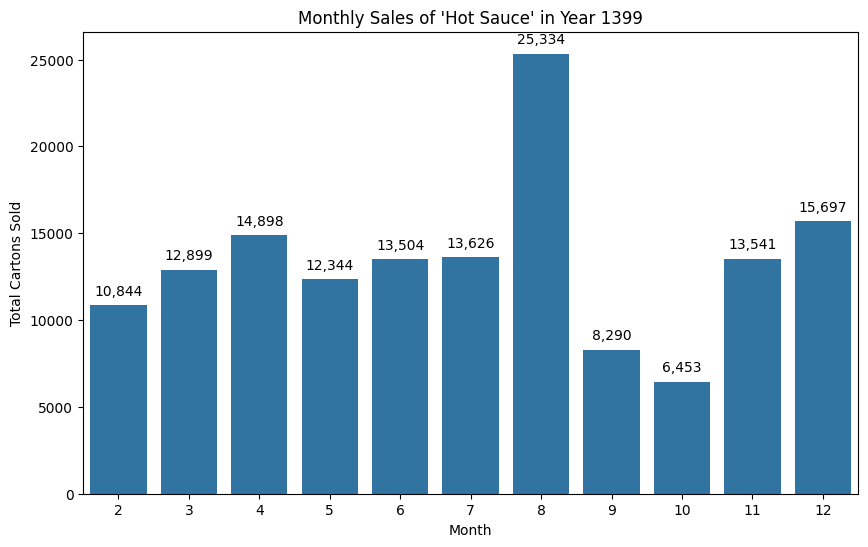

In [47]:
#Second ranked product group performance in 1399

#Specify the year
year = 1399

#Filter data for the specific product group and year
product_group_data = Data[(Data['ProductGroup'] == 'سس گرم') & (Data['Year'] == year)]

#Group data by month and sum cartons
monthly_sales = product_group_data.groupby('MonthNumeric')['Cartons'].sum().reset_index()

#Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='MonthNumeric', y='Cartons', data=monthly_sales)
month_labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
ax.set_xticklabels([month_labels[month - 1] for month in monthly_sales['MonthNumeric']])
plt.xlabel("Month")
plt.ylabel("Total Cartons Sold")
plt.title(f"Monthly Sales of 'Hot Sauce' in Year {year}")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

<ipython-input-48-7f88e7f843ad>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([month_labels[month - 1] for month in monthly_sales['MonthNumeric']])


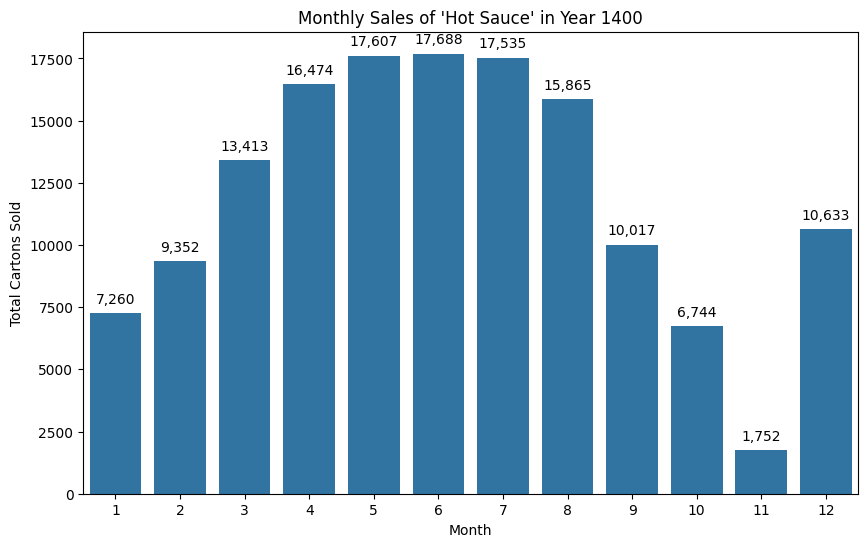

In [48]:
#Second ranked product group performance in 1400

#Specify the year
year = 1400

#Filter data for the specific product group and year
product_group_data = Data[(Data['ProductGroup'] == 'سس گرم') & (Data['Year'] == year)]

#Group data by month and sum cartons
monthly_sales = product_group_data.groupby('MonthNumeric')['Cartons'].sum().reset_index()

#Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='MonthNumeric', y='Cartons', data=monthly_sales)
month_labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
ax.set_xticklabels([month_labels[month - 1] for month in monthly_sales['MonthNumeric']])
plt.xlabel("Month")
plt.ylabel("Total Cartons Sold")
plt.title(f"Monthly Sales of 'Hot Sauce' in Year {year}")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

<ipython-input-49-ef37e890a552>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([month_labels[month - 1] for month in monthly_sales['MonthNumeric']])


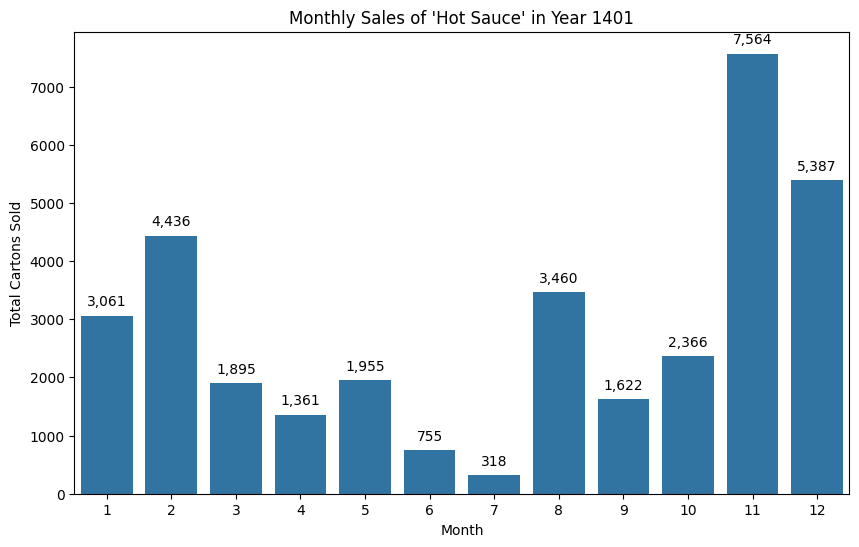

In [49]:
#Second ranked product group performance in 1401

#Specify the year
year = 1401

#Filter data for the specific product group and year
product_group_data = Data[(Data['ProductGroup'] == 'سس گرم') & (Data['Year'] == year)]

#Group data by month and sum cartons
monthly_sales = product_group_data.groupby('MonthNumeric')['Cartons'].sum().reset_index()

#Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='MonthNumeric', y='Cartons', data=monthly_sales)
month_labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
ax.set_xticklabels([month_labels[month - 1] for month in monthly_sales['MonthNumeric']])
plt.xlabel("Month")
plt.ylabel("Total Cartons Sold")
plt.title(f"Monthly Sales of 'Hot Sauce' in Year {year}")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

<ipython-input-50-bea54bfd04f8>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([month_labels[month - 1] for month in monthly_sales['MonthNumeric']])


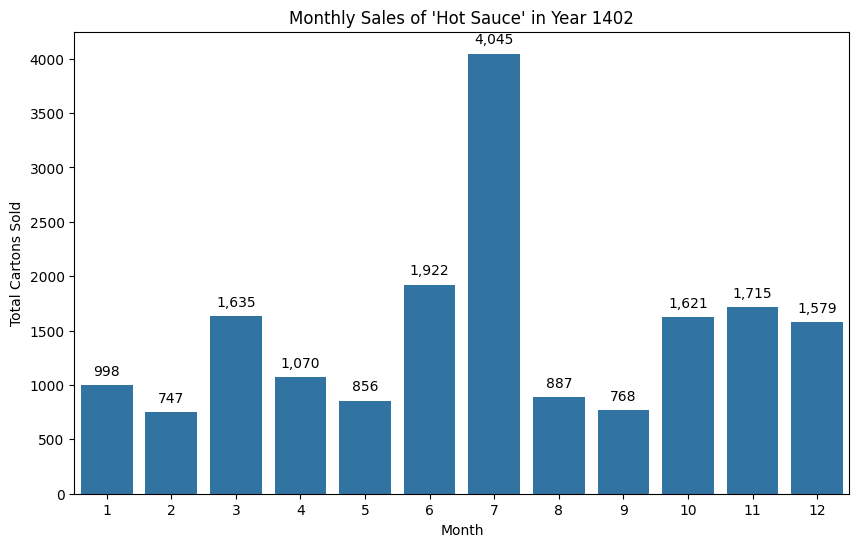

In [50]:
#Second ranked product group performance in 1402

#Specify the year
year = 1402

#Filter data for the specific product group and year
product_group_data = Data[(Data['ProductGroup'] == 'سس گرم') & (Data['Year'] == year)]

#Group data by month and sum cartons
monthly_sales = product_group_data.groupby('MonthNumeric')['Cartons'].sum().reset_index()

#Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='MonthNumeric', y='Cartons', data=monthly_sales)
month_labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
ax.set_xticklabels([month_labels[month - 1] for month in monthly_sales['MonthNumeric']])
plt.xlabel("Month")
plt.ylabel("Total Cartons Sold")
plt.title(f"Monthly Sales of 'Hot Sauce' in Year {year}")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

<ipython-input-51-6750583ddba2>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([month_labels[month - 1] for month in monthly_sales['MonthNumeric']])


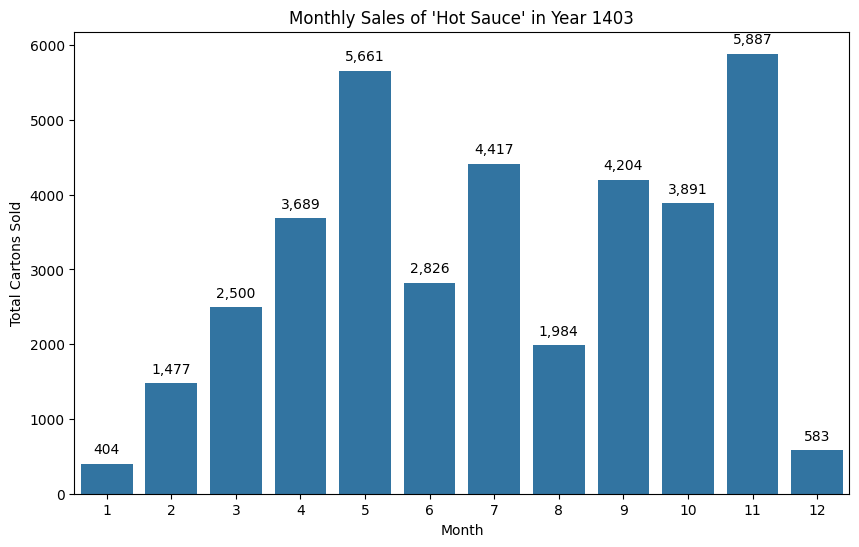

In [51]:
#Second ranked product group performance in 1403

#Specify the year
year = 1403

#Filter data for the specific product group and year
product_group_data = Data[(Data['ProductGroup'] == 'سس گرم') & (Data['Year'] == year)]

#Group data by month and sum cartons
monthly_sales = product_group_data.groupby('MonthNumeric')['Cartons'].sum().reset_index()

#Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='MonthNumeric', y='Cartons', data=monthly_sales)
month_labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
ax.set_xticklabels([month_labels[month - 1] for month in monthly_sales['MonthNumeric']])
plt.xlabel("Month")
plt.ylabel("Total Cartons Sold")
plt.title(f"Monthly Sales of 'Hot Sauce' in Year {year}")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

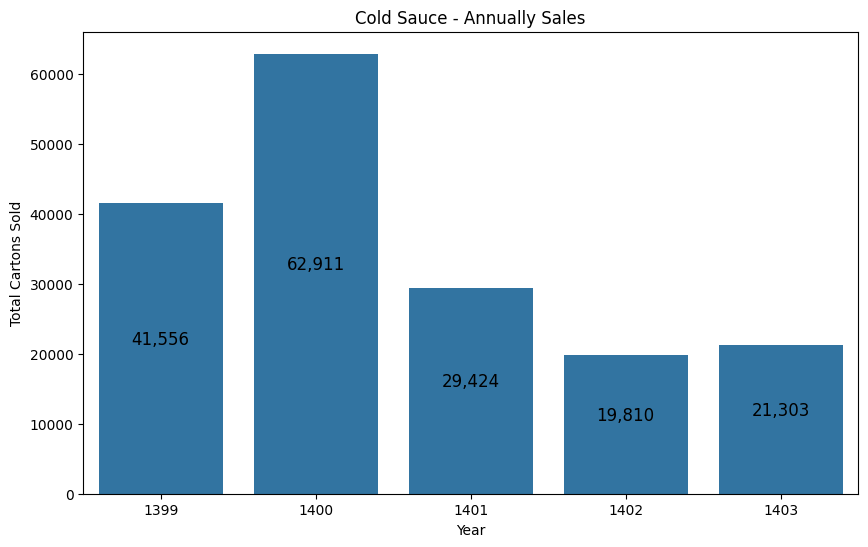

In [ ]:
#Third ranked product group performance in 5 years

#Filter data for the specific product group first
AnnuallySales = Data[Data['ProductGroup'] == 'سس سرد'].groupby('Year')['Cartons'].sum().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Year', y='Cartons', data=AnnuallySales)

#Add text on top of each bar
for bar in ax.patches:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() / 2,
             f"{int(bar.get_height()):,}",
             ha='center', va='bottom', fontsize=12)

#Titles and labels
plt.title('Cold Sauce - Annually Sales')
plt.xlabel('Year')
plt.ylabel('Total Cartons Sold')
plt.show()

<ipython-input-52-ef2ba9d16a75>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([month_labels[month - 1] for month in monthly_sales['MonthNumeric']])


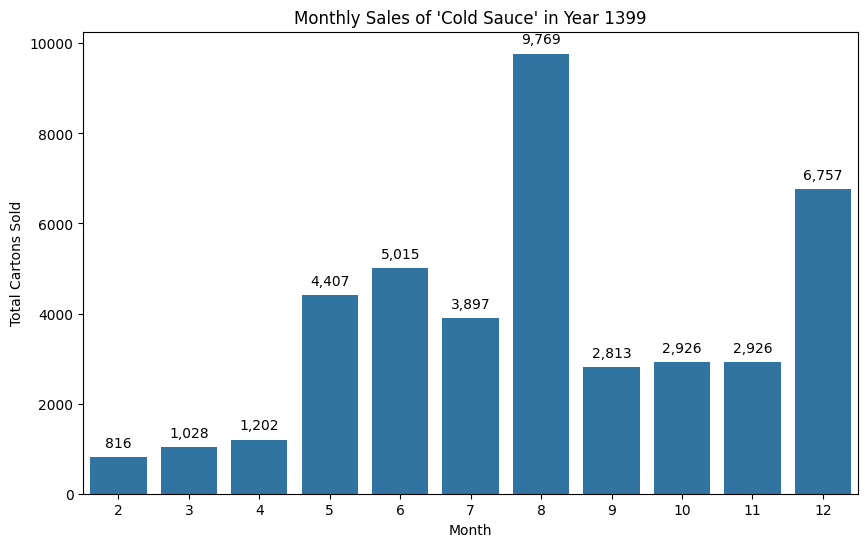

In [52]:
#Third ranked product group performance in 1399

#Specify the year
year = 1399

#Filter data for the specific product group and year
product_group_data = Data[(Data['ProductGroup'] == 'سس سرد') & (Data['Year'] == year)]

#Group data by month and sum cartons
monthly_sales = product_group_data.groupby('MonthNumeric')['Cartons'].sum().reset_index()

#Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='MonthNumeric', y='Cartons', data=monthly_sales)
month_labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
ax.set_xticklabels([month_labels[month - 1] for month in monthly_sales['MonthNumeric']])
plt.xlabel("Month")
plt.ylabel("Total Cartons Sold")
plt.title(f"Monthly Sales of 'Cold Sauce' in Year {year}")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

<ipython-input-53-5775a39df9da>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([month_labels[month - 1] for month in monthly_sales['MonthNumeric']])


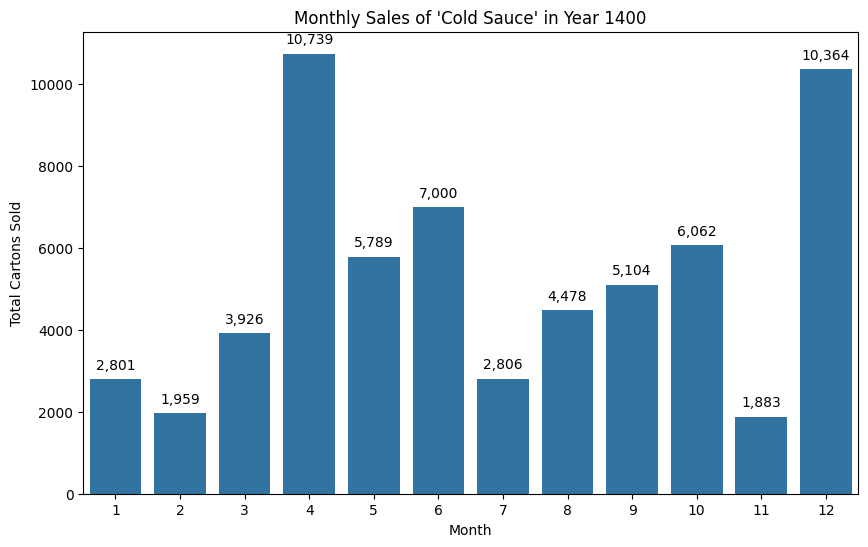

In [53]:
#Third ranked product group performance in 1400

#Specify the year
year = 1400

#Filter data for the specific product group and year
product_group_data = Data[(Data['ProductGroup'] == 'سس سرد') & (Data['Year'] == year)]

#Group data by month and sum cartons
monthly_sales = product_group_data.groupby('MonthNumeric')['Cartons'].sum().reset_index()

#Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='MonthNumeric', y='Cartons', data=monthly_sales)
month_labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
ax.set_xticklabels([month_labels[month - 1] for month in monthly_sales['MonthNumeric']])
plt.xlabel("Month")
plt.ylabel("Total Cartons Sold")
plt.title(f"Monthly Sales of 'Cold Sauce' in Year {year}")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

<ipython-input-54-b4bce958fd15>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([month_labels[month - 1] for month in monthly_sales['MonthNumeric']])


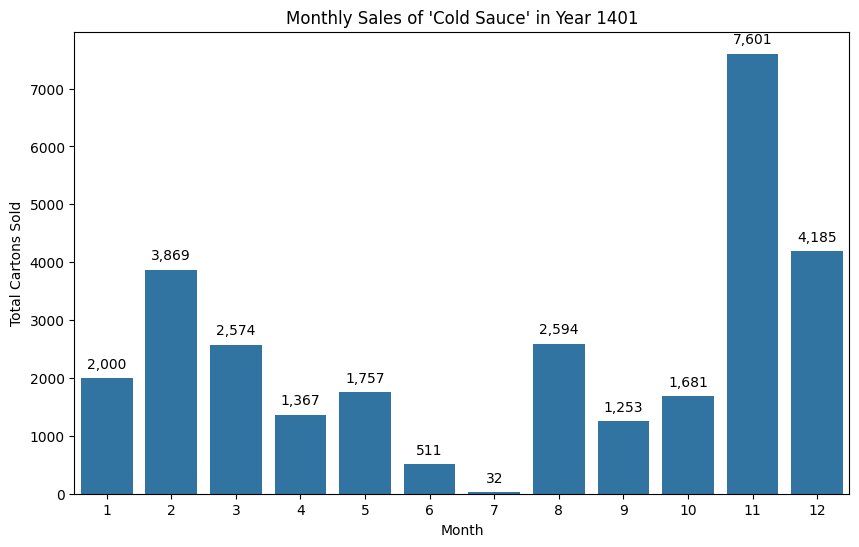

In [54]:
#Third ranked product group performance in 1401

#Specify the year
year = 1401

#Filter data for the specific product group and year
product_group_data = Data[(Data['ProductGroup'] == 'سس سرد') & (Data['Year'] == year)]

#Group data by month and sum cartons
monthly_sales = product_group_data.groupby('MonthNumeric')['Cartons'].sum().reset_index()

#Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='MonthNumeric', y='Cartons', data=monthly_sales)
month_labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
ax.set_xticklabels([month_labels[month - 1] for month in monthly_sales['MonthNumeric']])
plt.xlabel("Month")
plt.ylabel("Total Cartons Sold")
plt.title(f"Monthly Sales of 'Cold Sauce' in Year {year}")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

<ipython-input-55-d082c3d3269c>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([month_labels[month - 1] for month in monthly_sales['MonthNumeric']])


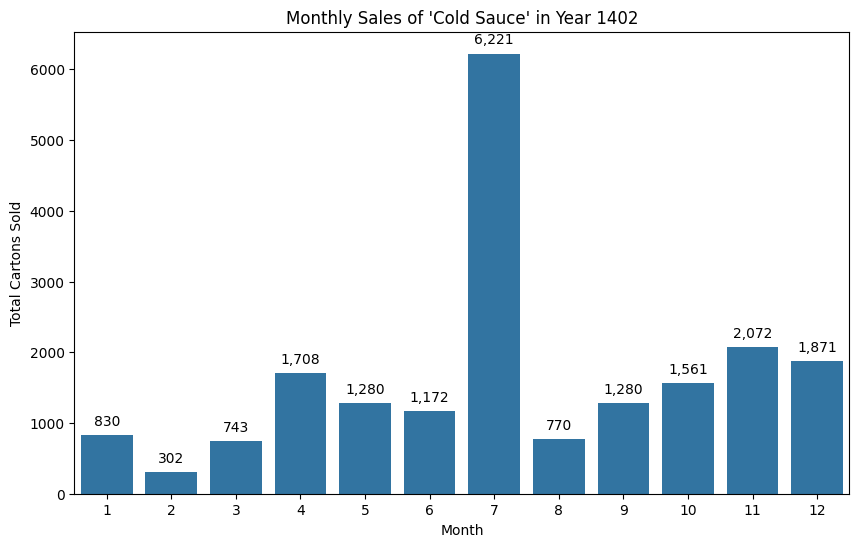

In [55]:
#Third ranked product group performance in 1402

#Specify the year
year = 1402

#Filter data for the specific product group and year
product_group_data = Data[(Data['ProductGroup'] == 'سس سرد') & (Data['Year'] == year)]

#Group data by month and sum cartons
monthly_sales = product_group_data.groupby('MonthNumeric')['Cartons'].sum().reset_index()

#Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='MonthNumeric', y='Cartons', data=monthly_sales)
month_labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
ax.set_xticklabels([month_labels[month - 1] for month in monthly_sales['MonthNumeric']])
plt.xlabel("Month")
plt.ylabel("Total Cartons Sold")
plt.title(f"Monthly Sales of 'Cold Sauce' in Year {year}")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

<ipython-input-56-1bc33c7b6b81>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([month_labels[month - 1] for month in monthly_sales['MonthNumeric']])


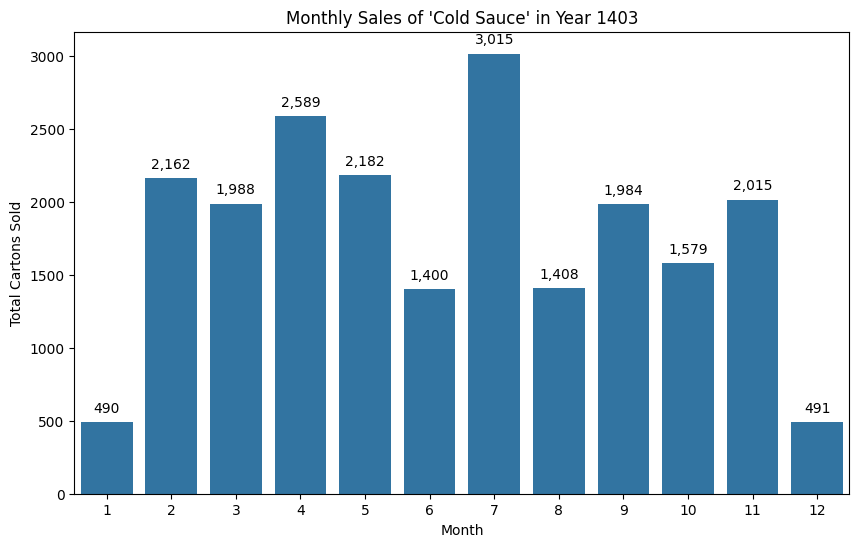

In [56]:
#Third ranked product group performance in 1403

#Specify the year
year = 1403

#Filter data for the specific product group and year
product_group_data = Data[(Data['ProductGroup'] == 'سس سرد') & (Data['Year'] == year)]

#Group data by month and sum cartons
monthly_sales = product_group_data.groupby('MonthNumeric')['Cartons'].sum().reset_index()

#Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='MonthNumeric', y='Cartons', data=monthly_sales)
month_labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
ax.set_xticklabels([month_labels[month - 1] for month in monthly_sales['MonthNumeric']])
plt.xlabel("Month")
plt.ylabel("Total Cartons Sold")
plt.title(f"Monthly Sales of 'Cold Sauce' in Year {year}")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

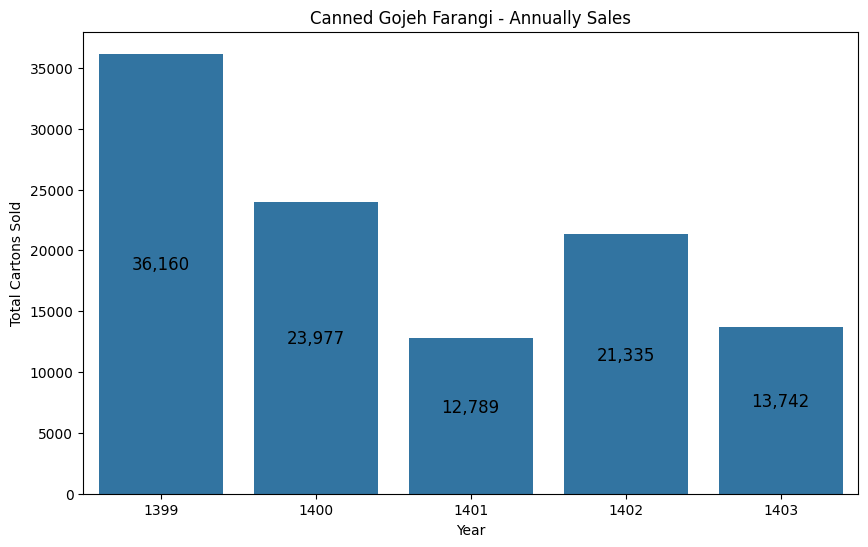

In [ ]:
#Fourth ranked product group performance in 5 years

#Filter data for the specific product group first
AnnuallySales = Data[Data['ProductGroup'] == 'کنسرو گوجه فرنگي روژين'].groupby('Year')['Cartons'].sum().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Year', y='Cartons', data=AnnuallySales)

#Add text on top of each bar
for bar in ax.patches:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() / 2,
             f"{int(bar.get_height()):,}",
             ha='center', va='bottom', fontsize=12)

#Titles and labels
plt.title('Canned Gojeh Farangi - Annually Sales')
plt.xlabel('Year')
plt.ylabel('Total Cartons Sold')
plt.show()

<ipython-input-58-0ced64e14d85>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([month_labels[month - 1] for month in monthly_sales['MonthNumeric']])


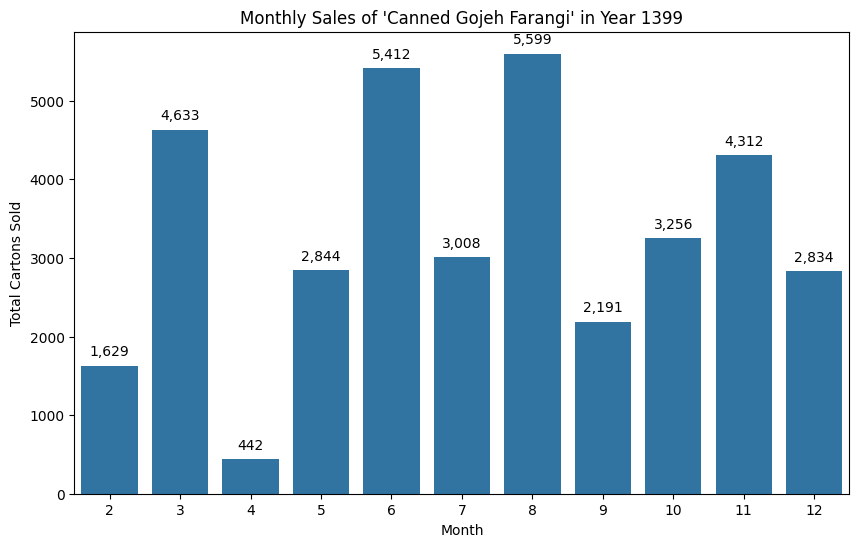

In [58]:
#Fourth ranked product group performance in 1399

#Specify the year
year = 1399

#Filter data for the specific product group and year
product_group_data = Data[(Data['ProductGroup'] == 'کنسرو گوجه فرنگي روژين') & (Data['Year'] == year)]

#Group data by month and sum cartons
monthly_sales = product_group_data.groupby('MonthNumeric')['Cartons'].sum().reset_index()

#Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='MonthNumeric', y='Cartons', data=monthly_sales)
month_labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
ax.set_xticklabels([month_labels[month - 1] for month in monthly_sales['MonthNumeric']])
plt.xlabel("Month")
plt.ylabel("Total Cartons Sold")
plt.title(f"Monthly Sales of 'Canned Gojeh Farangi' in Year {year}")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

<ipython-input-59-1c164da401f5>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([month_labels[month - 1] for month in monthly_sales['MonthNumeric']])


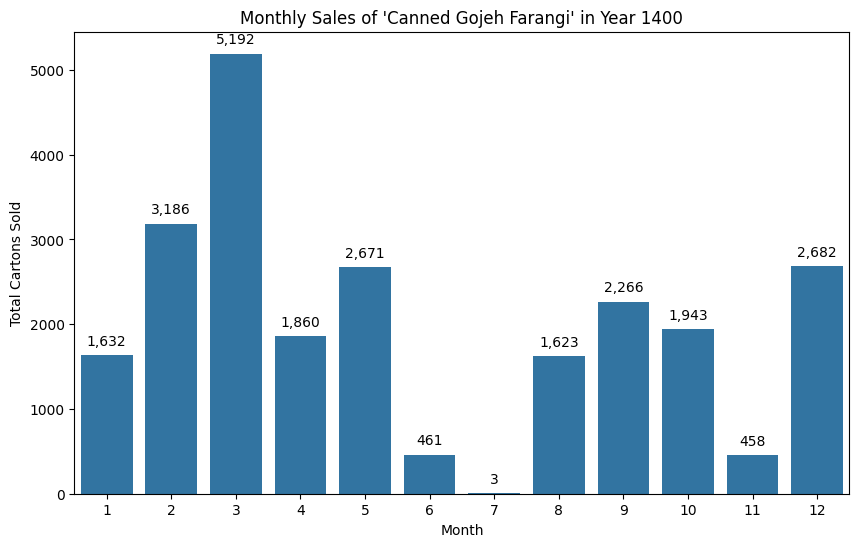

In [59]:
#Fourth ranked product group performance in 1400

#Specify the year
year = 1400

#Filter data for the specific product group and year
product_group_data = Data[(Data['ProductGroup'] == 'کنسرو گوجه فرنگي روژين') & (Data['Year'] == year)]

#Group data by month and sum cartons
monthly_sales = product_group_data.groupby('MonthNumeric')['Cartons'].sum().reset_index()

#Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='MonthNumeric', y='Cartons', data=monthly_sales)
month_labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
ax.set_xticklabels([month_labels[month - 1] for month in monthly_sales['MonthNumeric']])
plt.xlabel("Month")
plt.ylabel("Total Cartons Sold")
plt.title(f"Monthly Sales of 'Canned Gojeh Farangi' in Year {year}")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

<ipython-input-60-010f53520f2a>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([month_labels[month - 1] for month in monthly_sales['MonthNumeric']])


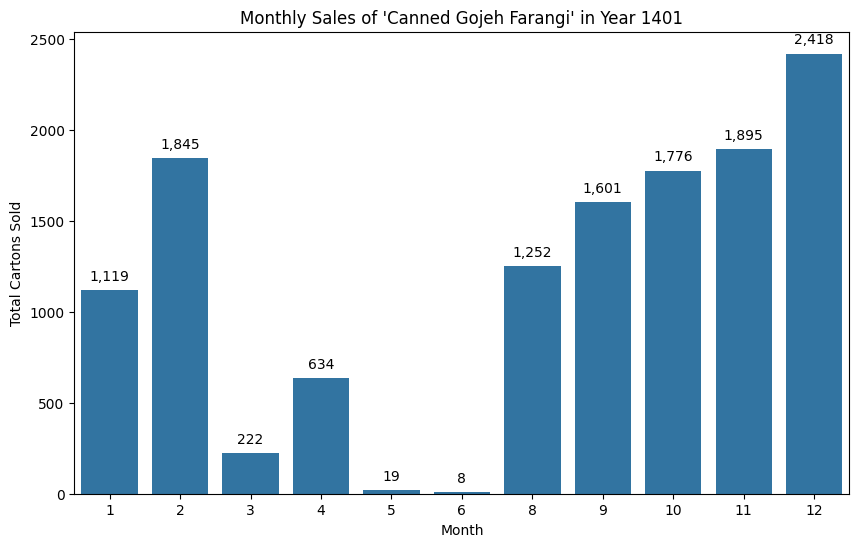

In [60]:
#Fourth ranked product group performance in 1401

#Specify the year
year = 1401

#Filter data for the specific product group and year
product_group_data = Data[(Data['ProductGroup'] == 'کنسرو گوجه فرنگي روژين') & (Data['Year'] == year)]

#Group data by month and sum cartons
monthly_sales = product_group_data.groupby('MonthNumeric')['Cartons'].sum().reset_index()

#Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='MonthNumeric', y='Cartons', data=monthly_sales)
month_labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
ax.set_xticklabels([month_labels[month - 1] for month in monthly_sales['MonthNumeric']])
plt.xlabel("Month")
plt.ylabel("Total Cartons Sold")
plt.title(f"Monthly Sales of 'Canned Gojeh Farangi' in Year {year}")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

<ipython-input-61-c308a79fe458>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([month_labels[month - 1] for month in monthly_sales['MonthNumeric']])


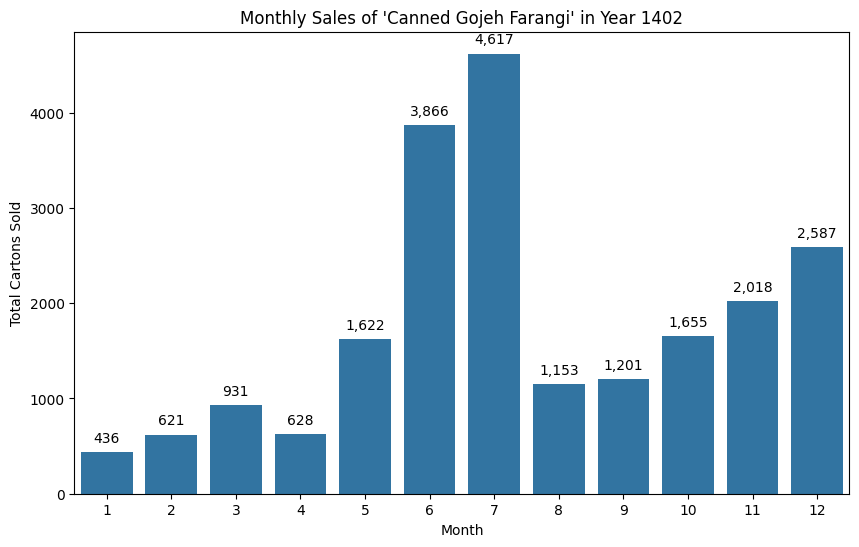

In [61]:
#Fourth ranked product group performance in 1402

#Specify the year
year = 1402

#Filter data for the specific product group and year
product_group_data = Data[(Data['ProductGroup'] == 'کنسرو گوجه فرنگي روژين') & (Data['Year'] == year)]

#Group data by month and sum cartons
monthly_sales = product_group_data.groupby('MonthNumeric')['Cartons'].sum().reset_index()

#Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='MonthNumeric', y='Cartons', data=monthly_sales)
month_labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
ax.set_xticklabels([month_labels[month - 1] for month in monthly_sales['MonthNumeric']])
plt.xlabel("Month")
plt.ylabel("Total Cartons Sold")
plt.title(f"Monthly Sales of 'Canned Gojeh Farangi' in Year {year}")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

<ipython-input-62-3991e87b1611>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([month_labels[month - 1] for month in monthly_sales['MonthNumeric']])


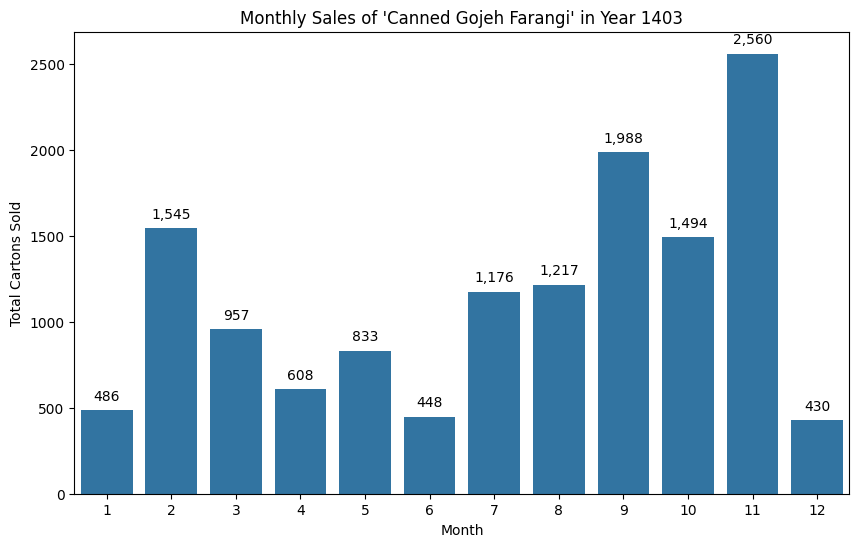

In [62]:
#Fourth ranked product group performance in 1403

#Specify the year
year = 1403

#Filter data for the specific product group and year
product_group_data = Data[(Data['ProductGroup'] == 'کنسرو گوجه فرنگي روژين') & (Data['Year'] == year)]

#Group data by month and sum cartons
monthly_sales = product_group_data.groupby('MonthNumeric')['Cartons'].sum().reset_index()

#Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='MonthNumeric', y='Cartons', data=monthly_sales)
month_labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
ax.set_xticklabels([month_labels[month - 1] for month in monthly_sales['MonthNumeric']])
plt.xlabel("Month")
plt.ylabel("Total Cartons Sold")
plt.title(f"Monthly Sales of 'Canned Gojeh Farangi' in Year {year}")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

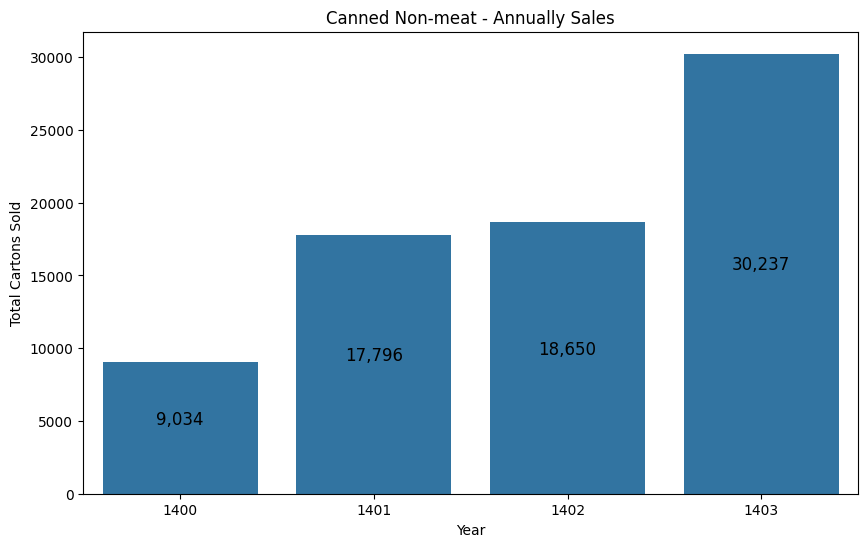

In [ ]:
#Fifth ranked product group performance in 5 years

#Filter data for the specific product group first
AnnuallySales = Data[Data['ProductGroup'] == 'کنسرو غيرگوشتي'].groupby('Year')['Cartons'].sum().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Year', y='Cartons', data=AnnuallySales)

#Add text on top of each bar
for bar in ax.patches:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() / 2,
             f"{int(bar.get_height()):,}",
             ha='center', va='bottom', fontsize=12)

#Titles and labels
plt.title('Canned Non-meat - Annually Sales')
plt.xlabel('Year')
plt.ylabel('Total Cartons Sold')
plt.show()

<ipython-input-34-d8c986e0cf69>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([month_labels[month - 1] for month in monthly_sales['MonthNumeric']])


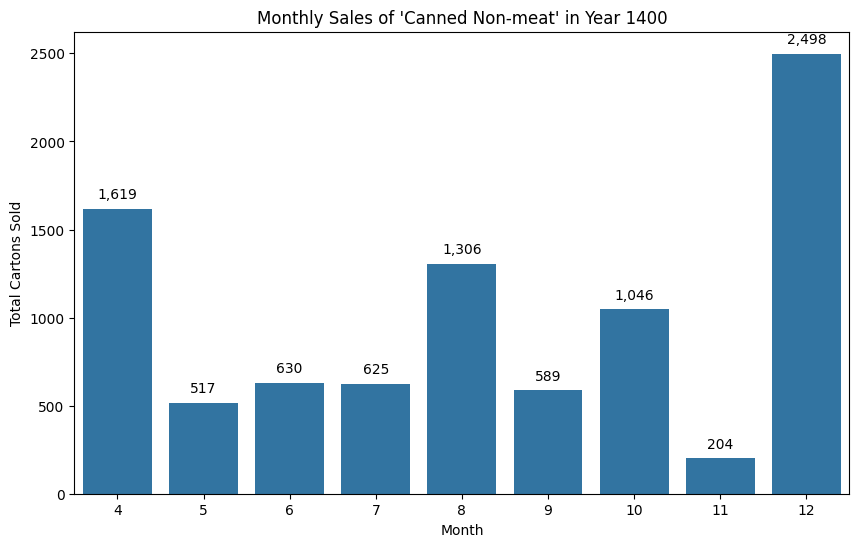

In [34]:
#Fifth ranked product group performance in 1400

#Specify the year
year = 1400

#Filter data for the specific product group and year
product_group_data = Data[(Data['ProductGroup'] == 'کنسرو غيرگوشتي') & (Data['Year'] == year)]

#Group data by month and sum cartons
monthly_sales = product_group_data.groupby('MonthNumeric')['Cartons'].sum().reset_index()

#Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='MonthNumeric', y='Cartons', data=monthly_sales)
month_labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
ax.set_xticklabels([month_labels[month - 1] for month in monthly_sales['MonthNumeric']])
plt.xlabel("Month")
plt.ylabel("Total Cartons Sold")
plt.title(f"Monthly Sales of 'Canned Non-meat' in Year {year}")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

<ipython-input-35-55e97ac60220>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([month_labels[month - 1] for month in monthly_sales['MonthNumeric']])


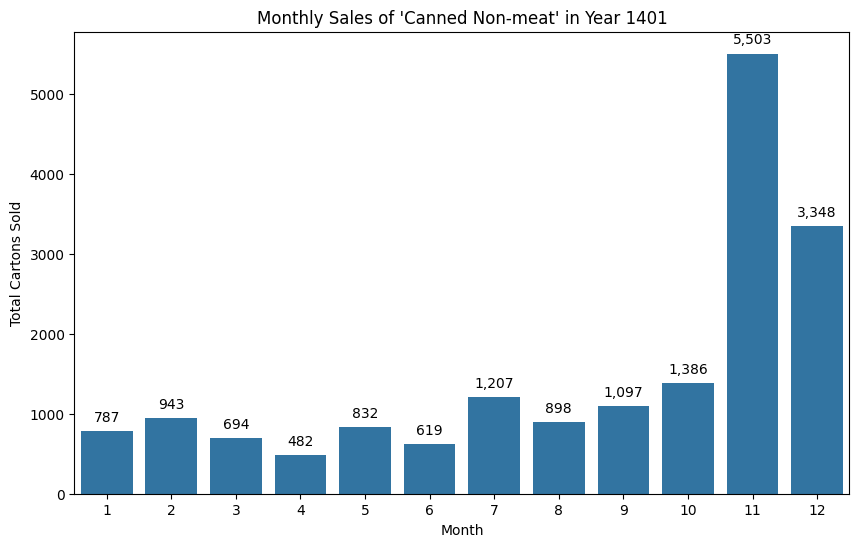

In [35]:
#Fifth ranked product group performance in 1400

#Specify the year
year = 1401

#Filter data for the specific product group and year
product_group_data = Data[(Data['ProductGroup'] == 'کنسرو غيرگوشتي') & (Data['Year'] == year)]

#Group data by month and sum cartons
monthly_sales = product_group_data.groupby('MonthNumeric')['Cartons'].sum().reset_index()

#Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='MonthNumeric', y='Cartons', data=monthly_sales)
month_labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
ax.set_xticklabels([month_labels[month - 1] for month in monthly_sales['MonthNumeric']])
plt.xlabel("Month")
plt.ylabel("Total Cartons Sold")
plt.title(f"Monthly Sales of 'Canned Non-meat' in Year {year}")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

<ipython-input-36-e92a833c46bd>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([month_labels[month - 1] for month in monthly_sales['MonthNumeric']])


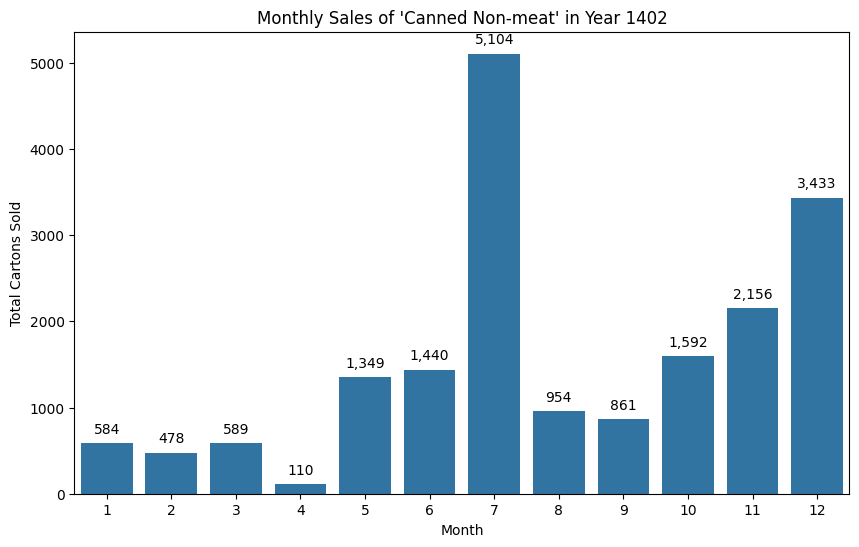

In [36]:
#Fifth ranked product group performance in 1400

#Specify the year
year = 1402

#Filter data for the specific product group and year
product_group_data = Data[(Data['ProductGroup'] == 'کنسرو غيرگوشتي') & (Data['Year'] == year)]

#Group data by month and sum cartons
monthly_sales = product_group_data.groupby('MonthNumeric')['Cartons'].sum().reset_index()

#Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='MonthNumeric', y='Cartons', data=monthly_sales)
month_labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
ax.set_xticklabels([month_labels[month - 1] for month in monthly_sales['MonthNumeric']])
plt.xlabel("Month")
plt.ylabel("Total Cartons Sold")
plt.title(f"Monthly Sales of 'Canned Non-meat' in Year {year}")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

<ipython-input-37-437286102944>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([month_labels[month - 1] for month in monthly_sales['MonthNumeric']])


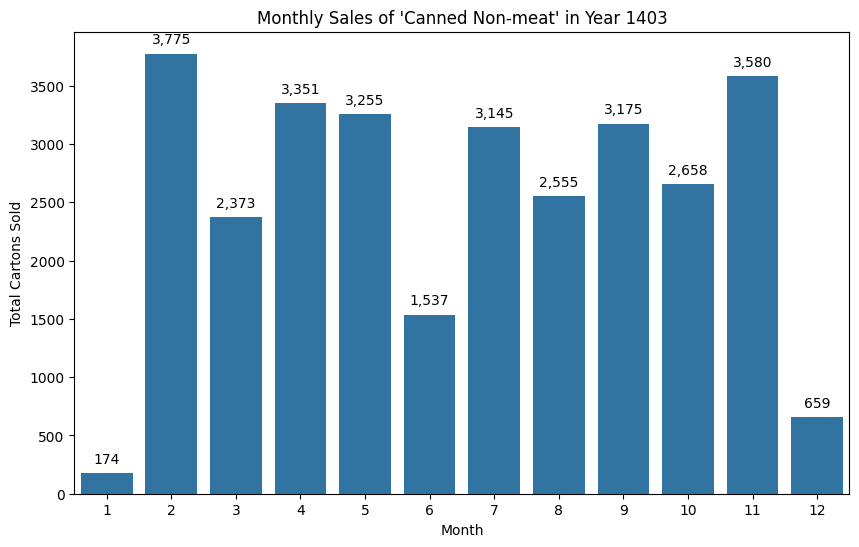

In [37]:
#Fifth ranked product group performance in 1400

#Specify the year
year = 1403

#Filter data for the specific product group and year
product_group_data = Data[(Data['ProductGroup'] == 'کنسرو غيرگوشتي') & (Data['Year'] == year)]

#Group data by month and sum cartons
monthly_sales = product_group_data.groupby('MonthNumeric')['Cartons'].sum().reset_index()

#Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='MonthNumeric', y='Cartons', data=monthly_sales)
month_labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
ax.set_xticklabels([month_labels[month - 1] for month in monthly_sales['MonthNumeric']])
plt.xlabel("Month")
plt.ylabel("Total Cartons Sold")
plt.title(f"Monthly Sales of 'Canned Non-meat' in Year {year}")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

In [ ]:
#Product Group (Per Year)

for year in Data['Year'].unique():
    # Filter data for the specific year and aggregate cartons by ProductGroup
    YearlyTopProductGroup = Data[Data['Year'] == year].groupby('ProductGroup')['Cartons'].sum().reset_index()

    # Calculate the total cartons for the year
    total_cartons = YearlyTopProductGroup['Cartons'].sum()

    # Calculate the percentage of each ProductGroup
    YearlyTopProductGroup['Percentage'] = (YearlyTopProductGroup['Cartons'] / total_cartons) * 100

    # Sort the values in descending order based on Cartons
    YearlyTopProductGroup = YearlyTopProductGroup.sort_values(by='Cartons', ascending=False)

    # Format the values for better readability
    YearlyTopProductGroup["Cartons"] = YearlyTopProductGroup["Cartons"].apply(lambda x: f"{x:,}")
    YearlyTopProductGroup["Percentage"] = YearlyTopProductGroup["Percentage"].apply(lambda x: f"{x:.2f}%")

    # Print results
    print(f"Top Product Groups for Year {year}:\n")
    print(YearlyTopProductGroup[['ProductGroup', 'Cartons', 'Percentage']].head())  # Display top product groups
    print('\n')

Top Product Groups for Year 1399:

             ProductGroup  Cartons Percentage
0     رب گوجه فرنگي روژين  533,801     70.33%
2                  سس گرم  147,430     19.43%
1                  سس سرد   41,556      5.48%
3  کنسرو گوجه فرنگي روژين   36,160      4.76%


Top Product Groups for Year 1400:

             ProductGroup  Cartons Percentage
0     رب گوجه فرنگي روژين  570,860     70.38%
2                  سس گرم  144,340     17.80%
1                  سس سرد   62,911      7.76%
4  کنسرو گوجه فرنگي روژين   23,977      2.96%
3          کنسرو غيرگوشتي    9,034      1.11%


Top Product Groups for Year 1401:

             ProductGroup  Cartons Percentage
0     رب گوجه فرنگي روژين  420,322     81.69%
2                  سس گرم   34,180      6.64%
1                  سس سرد   29,424      5.72%
3          کنسرو غيرگوشتي   17,796      3.46%
4  کنسرو گوجه فرنگي روژين   12,789      2.49%


Top Product Groups for Year 1402:

             ProductGroup  Cartons Percentage
0     رب گوجه فرنگي روژين 

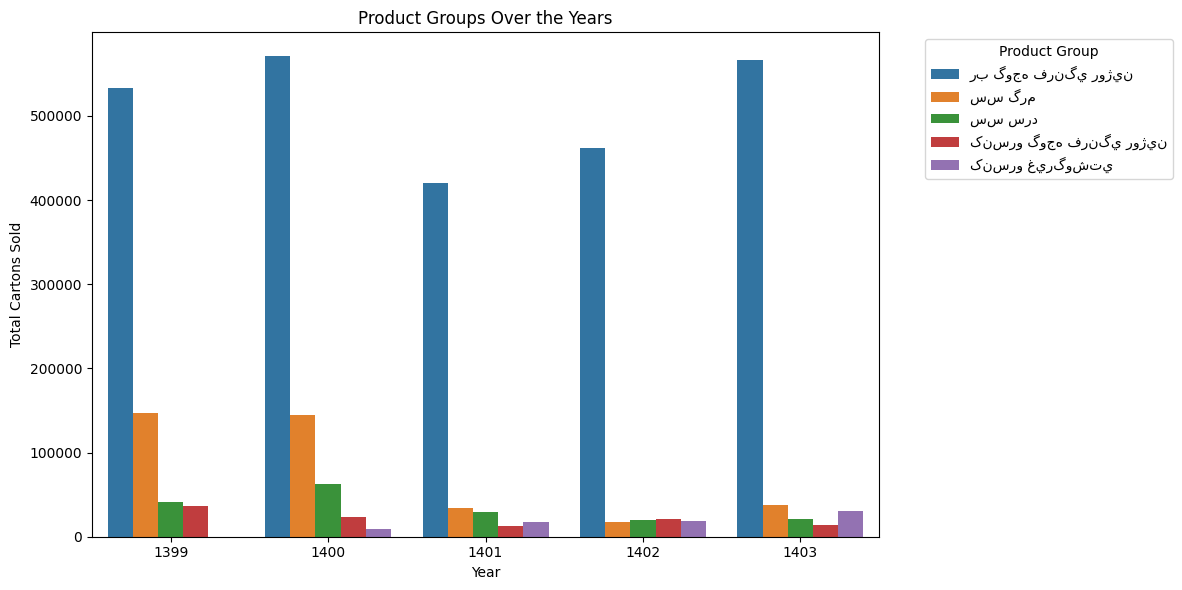

In [ ]:
#Product Group (Per Year)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Get top product groups for each year
yearly_top_products = []
for year in Data['Year'].unique():
    YearlyTopProductGroup = Data[Data['Year'] == year].groupby('ProductGroup')['Cartons'].sum().reset_index()
    YearlyTopProductGroup = YearlyTopProductGroup.sort_values(by='Cartons', ascending=False)
    YearlyTopProductGroup["Cartons"] = YearlyTopProductGroup["Cartons"].apply(lambda x: f"{x:,}")
    YearlyTopProductGroup['Year'] = year  # Add year column
    yearly_top_products.append(YearlyTopProductGroup.head())  # Append top 5 product groups

#Combine yearly data
all_top_products = pd.concat(yearly_top_products)

#Convert 'Cartons' to numeric
all_top_products['Cartons'] = all_top_products['Cartons'].str.replace(',', '').astype(int)

#Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=all_top_products, x='Year', y='Cartons', hue='ProductGroup')
plt.title('Product Groups Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Cartons Sold')
plt.legend(title='Product Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [17]:
#Top and Low Perform Product Codes (5 Years)

# Calculate total cartons sold
total_cartons = Data['Cartons'].sum()

# Top Perform Products
TopProductCode = Data.groupby(['ProductName'])['Cartons'].sum().reset_index()
TopProductCode = TopProductCode.sort_values(by='Cartons', ascending=False)
TopProductCode['PortionOfTotal'] = (TopProductCode['Cartons'] / total_cartons) * 100
TopProductCode['PortionOfTotal'] = TopProductCode['PortionOfTotal'].apply(lambda x: f"{x:.2f}%")  # Format as percentage
TopProductCode["Cartons"] = TopProductCode["Cartons"].apply(lambda x: f"{x:,}")

print(TopProductCode[['ProductName', 'Cartons', 'PortionOfTotal']].head(10))
print('\n')

# Low Perform Products
LowPerformProductCode = Data.groupby(['ProductName'])['Cartons'].sum().reset_index()
LowPerformProductCode = LowPerformProductCode.sort_values(by='Cartons', ascending=True)
LowPerformProductCode['PortionOfTotal'] = (LowPerformProductCode['Cartons'] / total_cartons) * 100
LowPerformProductCode['PortionOfTotal'] = LowPerformProductCode['PortionOfTotal'].apply(lambda x: f"{x:.2f}%")  # Format as percentage
LowPerformProductCode["Cartons"] = LowPerformProductCode["Cartons"].apply(lambda x: f"{x:,}")

print(LowPerformProductCode[['ProductName', 'Cartons', 'PortionOfTotal']].head(10))
print('\n')

# Display tables with styling (if needed)
display(TopProductCode[['ProductName', 'Cartons', 'PortionOfTotal']].head(10).style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#f2f2f2'), ('text-align', 'center')]},
    {'selector': 'td', 'props': [('text-align', 'center')]}
]))
print('\n')

display(LowPerformProductCode[['ProductName', 'Cartons', 'PortionOfTotal']].head(10).style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#f2f2f2'), ('text-align', 'center')]},
    {'selector': 'td', 'props': [('text-align', 'center')]}
]))

                                       ProductName    Cartons PortionOfTotal
6    رب گوجه فرنگي قرمز آسان بازشو روژين  800 گرمي  2,163,288         65.68%
17                        سس بطري کچاپ ساده460گرمي    270,766          8.22%
4                رب گوجه فرنگي روژين شيشه 700 گرمي    223,137          6.78%
12                      سس بطري هزارجزيره 420 گرمي     73,084          2.22%
3                رب گوجه فرنگي روژين شيشه 680 گرمي     61,930          1.88%
5   رب گوجه فرنگي قرمز آسان بازشو  روژين  400 گرمي     61,417          1.86%
14                        سس بطري کچاپ تند460 گرمي     58,848          1.79%
8                         سس بطري فرانسوي 420 گرمي     39,530          1.20%
16              سس بطري کچاپ ساده 460گرمي 12 عددي      37,768          1.15%
37  کنسرو گوجه فرنگي قطعه قطعه شده (دايس)410 گرمي      37,171          1.13%


                                          ProductName Cartons PortionOfTotal
38  کنسرو گوجه فرنگي پوست کنده (پيل) 3900 گرمي بدو...      17          0.0

,ProductName,Cartons,PortionOfTotal
6,رب گوجه فرنگي قرمز آسان بازشو روژين 800 گرمي,"2,163,288",65.68%
17,سس بطري کچاپ ساده460گرمي,"270,766",8.22%
4,رب گوجه فرنگي روژين شيشه 700 گرمي,"223,137",6.78%
12,سس بطري هزارجزيره 420 گرمي,"73,084",2.22%
3,رب گوجه فرنگي روژين شيشه 680 گرمي,"61,930",1.88%
5,رب گوجه فرنگي قرمز آسان بازشو روژين 400 گرمي,"61,417",1.86%
14,سس بطري کچاپ تند460 گرمي,"58,848",1.79%
8,سس بطري فرانسوي 420 گرمي,"39,530",1.20%
16,سس بطري کچاپ ساده 460گرمي 12 عددي,"37,768",1.15%
37,کنسرو گوجه فرنگي قطعه قطعه شده (دايس)410 گرمي,"37,171",1.13%


,ProductName,Cartons,PortionOfTotal
38,کنسرو گوجه فرنگي پوست کنده (پيل) 3900 گرمي بدون نمک- EO شمسي روژين,17,0.00%
35,کنسرو گوجه فرنگي قطعه قطعه شده (دايس) 3900 گرمي,125,0.00%
7,سس بطري فرانسوي 400 گرمي روژين,126,0.00%
18,سس شيشه مايونز 250 گرمي روژين,219,0.01%
28,کنسرو مايه ماکاروني و لازانيا با سويا و قارچ 400 گرمي روژين,334,0.01%
2,رب گوجه فرنگي روژين شيشه 280 گرمي,630,0.02%
20,کنسرو خوراک بادمجان 400 گرمي روژين,"1,669",0.05%
26,کنسرو لوبيا چيتي با قارچ 400 گرمي روژين,"1,976",0.06%
30,کنسرو نخود آبگوشتي 400 گرمي روژين,"2,080",0.06%
21,کنسرو خوراک بادمجان 420 گرمي,"2,847",0.09%


In [ ]:
#Correlation between unit price changes and cartons over the past 5 years

#Calculate price changes and carton sales per year
YearlyData = Data.groupby('Year').agg(
    UnitPriceChange=('UnitPrice', lambda x: x.iloc[-1] - x.iloc[0]),  #Price change within the year
    TotalCartons=('Cartons', 'sum')                                   #Total cartons sold in the year
                                     ).reset_index()

correlation = YearlyData['UnitPriceChange'].corr(YearlyData['TotalCartons'])
print(f"Correlation between unit price changes and the number of sold cartons: {correlation:.2f}")

Correlation between unit price changes and the number of sold cartons: -0.90


In [ ]:
#Correlation between cartons and net sales over the past 5 years

#Calculate total cartons and net sales per year
YearlyData = Data.groupby('Year').agg(
    TotalCartons=('Cartons', 'sum'),   #Total cartons sold in the year
    TotalNetSales=('NetSales', 'sum')  #Total net sales for the year
).reset_index()

correlation = YearlyData['TotalCartons'].corr(YearlyData['TotalNetSales'])
print(f"Correlation between cartons and net sales: {correlation:.2f}")

Correlation between cartons and net sales: -0.33


In [ ]:
!pip install pmdarima

In [ ]:
#Sales Forecast for the First Product Group

from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
import matplotlib.pyplot as plt
import pandas as pd

#Ensure MonthNumeric is treated as an ordered index
Data["YearMonth"] = Data["Year"].astype(str) + "-" + Data["MonthNumeric"].astype(str)

#Specify the target
Target = 'رب گوجه فرنگي روژين'

# Filter data for the target product group
ProductData = Data[Data['ProductGroup'] == Target]
MonthlyCartons = ProductData.groupby("YearMonth")["Cartons"].sum()
MonthlyCartons.index = range(1, len(MonthlyCartons) + 1)

#Auto-select best ARIMA model
model = pm.auto_arima(MonthlyCartons, seasonal=True, m=12,
                      trace=True, suppress_warnings=True, error_action="ignore")

#Train and Forecast
try:
    model_fit = ARIMA(MonthlyCartons, order=model.order,
                      seasonal_order=model.seasonal_order).fit()
    forecast = model_fit.forecast(steps=12)
except Exception as e:
    print(f"Error forecasting for {Target}: {e}")

#Print Forecasted Cartons
print(f"\nForecasted Cartons for the Next 12 Months ({Target}):")
for i, value in enumerate(forecast, start=len(MonthlyCartons) + 1):
    print(f"Month {i}: {value:,.0f} cartons")

#Calculate the average of the forecasted values
AverageForecast = forecast.mean()
print(f"\nAverage Monthly Forecast for {Target}: {AverageForecast:,.0f} cartons")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=1356.519, Time=1.96 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1352.053, Time=0.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1354.045, Time=0.64 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1351.818, Time=0.16 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1442.853, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=1353.318, Time=0.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=1353.805, Time=1.69 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=1352.276, Time=2.97 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=1354.749, Time=0.53 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=1354.275, Time=1.11 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=1350.687, Time=0.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=1352.659, Time=1.84 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=1350.589, Time=0.44 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=1352.587, Time=0.84 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=1352.243, Time=0.69 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,2)[12] intercept   : AIC=1354.196, Time=1.70 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(0,0,2)[12]             : AIC=inf, Time=1.60 sec

Best model:  ARIMA(0,0,0)(0,0,2)[12] intercept
Total fit time: 16.571 seconds


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'



Forecasted Cartons for the Next 12 Months (رب گوجه فرنگي روژين):
Month 60: 45,050 cartons
Month 61: 39,486 cartons
Month 62: 49,952 cartons
Month 63: 29,541 cartons
Month 64: 52,076 cartons
Month 65: 39,852 cartons
Month 66: 53,782 cartons
Month 67: 45,388 cartons
Month 68: 51,170 cartons
Month 69: 37,457 cartons
Month 70: 50,470 cartons
Month 71: 39,122 cartons

Average Monthly Forecast for رب گوجه فرنگي روژين: 44,446 cartons


In [ ]:
#Sales Forecast for the Second Product Group

from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
import matplotlib.pyplot as plt
import pandas as pd

#Ensure MonthNumeric is treated as an ordered index
Data["YearMonth"] = Data["Year"].astype(str) + "-" + Data["MonthNumeric"].astype(str)

#Specify the target
Target = 'سس گرم'

# Filter data for the target product group
ProductData = Data[Data['ProductGroup'] == Target]
MonthlyCartons = ProductData.groupby("YearMonth")["Cartons"].sum()
MonthlyCartons.index = range(1, len(MonthlyCartons) + 1)

#Auto-select best ARIMA model
model = pm.auto_arima(MonthlyCartons, seasonal=True, m=12,
                      trace=True, suppress_warnings=True, error_action="ignore")

#Train and Forecast
try:
    model_fit = ARIMA(MonthlyCartons, order=model.order,
                      seasonal_order=model.seasonal_order).fit()
    forecast = model_fit.forecast(steps=12)
except Exception as e:
    print(f"Error forecasting for {Target}: {e}")

#Print Forecasted Cartons
print(f"\nForecasted Cartons for the Next 12 Months ({Target}):")
for i, value in enumerate(forecast, start=len(MonthlyCartons) + 1):
    print(f"Month {i}: {value:,.0f} cartons")

#Calculate the average of the forecasted values
AverageForecast = forecast.mean()
print(f"\nAverage Monthly Forecast for {Target}: {AverageForecast:,.0f} cartons")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1128.133, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1129.573, Time=0.04 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1129.431, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1126.147, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1129.944, Time=0.02 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1130.004, Time=0.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1131.652, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1128.051, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1127.832, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.11 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 0.890 seconds

Forecasted Cartons for the Next 12 Months (سس گرم):
Month 60: 4,204 cartons
Month 61: 4,204 cartons
Month 62: 4,204 cartons
Month 63: 4,204 cartons
Month 64: 4,204 cartons
Month 65: 4,204 cartons
Month 66: 4,204 cartons
Month 67: 4,204 cartons
Month 68: 4,204 cartons
Month 69: 4,204 cartons
Month 70: 4,204 cartons
Month 71: 4,204 cartons

Average Monthly Forecast for سس گرم: 4,204 cartons


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
#Sales Forecast for the Third Product Group

from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
import matplotlib.pyplot as plt
import pandas as pd

#Ensure MonthNumeric is treated as an ordered index
Data["YearMonth"] = Data["Year"].astype(str) + "-" + Data["MonthNumeric"].astype(str)

#Specify the target
Target = 'سس سرد'

# Filter data for the target product group
ProductData = Data[Data['ProductGroup'] == Target]
MonthlyCartons = ProductData.groupby("YearMonth")["Cartons"].sum()
MonthlyCartons.index = range(1, len(MonthlyCartons) + 1)

#Auto-select best ARIMA model
model = pm.auto_arima(MonthlyCartons, seasonal=True, m=12,
                      trace=True, suppress_warnings=True, error_action="ignore")

#Train and Forecast
try:
    model_fit = ARIMA(MonthlyCartons, order=model.order,
                      seasonal_order=model.seasonal_order).fit()
    forecast = model_fit.forecast(steps=12)
except Exception as e:
    print(f"Error forecasting for {Target}: {e}")

#Print Forecasted Cartons
print(f"\nForecasted Cartons for the Next 12 Months ({Target}):")
for i, value in enumerate(forecast, start=len(MonthlyCartons) + 1):
    print(f"Month {i}: {value:,.0f} cartons")

#Calculate the average of the forecasted values
AverageForecast = forecast.mean()
print(f"\nAverage Monthly Forecast for {Target}: {AverageForecast:,.0f} cartons")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1101.052, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1083.568, Time=0.03 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1070.979, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1099.062, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1068.697, Time=0.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1070.980, Time=0.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1069.683, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=1069.375, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1082.096, Time=0.01 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=1067.811, Time=0.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=1069.673, Time=0.25 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=1069.675, Time=0.40 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.67 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[12] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,1,3)(0,0,0)[12] intercept   : AIC=1071.700, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=1071.320, Time=0.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[12] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[12]             : AIC=1065.812, Time=0.05 sec
 ARIMA(1,1,2)(1,0,0)[12]             : AIC=1067.673, Time=0.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,1)[12]             : AIC=1067.674, Time=0.12 sec
 ARIMA(1,1,2)(1,0,1)[12]             : AIC=1069.672, Time=0.19 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[12]             : AIC=1067.418, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[12]             : AIC=1067.788, Time=0.02 sec
 ARIMA(2,1,2)(0,0,0)[12]             : AIC=inf, Time=0.16 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[12]             : AIC=inf, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=1067.140, Time=0.01 sec
 ARIMA(0,1,3)(0,0,0)[12]             : AIC=1069.758, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[12]             : AIC=1069.366, Time=0.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[12]             : AIC=inf, Time=0.17 sec

Best model:  ARIMA(1,1,2)(0,0,0)[12]          
Total fit time: 5.479 seconds

Forecasted Cartons for the Next 12 Months (سس سرد):
Month 60: 1,805 cartons
Month 61: 2,095 cartons
Month 62: 2,305 cartons
Month 63: 2,457 cartons
Month 64: 2,567 cartons
Month 65: 2,646 cartons
Month 66: 2,704 cartons
Month 67: 2,746 cartons
Month 68: 2,777 cartons
Month 69: 2,799 cartons
Month 70: 2,814 cartons
Month 71: 2,826 cartons

Average Monthly Forecast for سس سرد: 2,545 cartons


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [ ]:
#Sales Forecast for the Fourth Product Group

from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
import matplotlib.pyplot as plt
import pandas as pd

#Ensure MonthNumeric is treated as an ordered index
Data["YearMonth"] = Data["Year"].astype(str) + "-" + Data["MonthNumeric"].astype(str)

#Specify the target
Target = 'کنسرو گوجه فرنگي روژين'

# Filter data for the target product group
ProductData = Data[Data['ProductGroup'] == Target]
MonthlyCartons = ProductData.groupby("YearMonth")["Cartons"].sum()
MonthlyCartons.index = range(1, len(MonthlyCartons) + 1)

#Auto-select best ARIMA model
model = pm.auto_arima(MonthlyCartons, seasonal=True, m=12,
                      trace=True, suppress_warnings=True, error_action="ignore")

#Train and Forecast
try:
    model_fit = ARIMA(MonthlyCartons, order=model.order,
                      seasonal_order=model.seasonal_order).fit()
    forecast = model_fit.forecast(steps=12)
except Exception as e:
    print(f"Error forecasting for {Target}: {e}")

#Print Forecasted Cartons
print(f"\nForecasted Cartons for the Next 12 Months ({Target}):")
for i, value in enumerate(forecast, start=len(MonthlyCartons) + 1):
    print(f"Month {i}: {value:,.0f} cartons")

#Calculate the average of the forecasted values
AverageForecast = forecast.mean()
print(f"\nAverage Monthly Forecast for {Target}: {AverageForecast:,.0f} cartons")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1005.634, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=999.553, Time=0.04 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1003.648, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=998.109, Time=0.02 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=999.370, Time=0.02 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=1001.246, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=997.794, Time=0.02 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=998.956, Time=0.04 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=998.496, Time=0.10 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=1000.065, Time=0.18 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(0,0,0)[12] intercept   : AIC=999.692, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.15 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(2,1,0)(0,0,0)[12]             : AIC=995.817, Time=0.06 sec
 ARIMA(2,1,0)(1,0,0)[12]             : AIC=996.980, Time=0.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,1)[12]             : AIC=996.581, Time=0.27 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(1,0,1)[12]             : AIC=998.190, Time=1.05 sec
 ARIMA(1,1,0)(0,0,0)[12]             : AIC=996.097, Time=0.04 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(0,0,0)[12]             : AIC=997.720, Time=0.52 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[12]             : AIC=987.789, Time=1.81 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(1,0,0)[12]             : AIC=989.363, Time=1.33 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,1)[12]             : AIC=989.192, Time=0.67 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(1,0,1)[12]             : AIC=991.016, Time=2.32 sec
 ARIMA(1,1,1)(0,0,0)[12]             : AIC=985.809, Time=0.05 sec
 ARIMA(1,1,1)(1,0,0)[12]             : AIC=987.401, Time=0.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,1)[12]             : AIC=987.238, Time=0.10 sec
 ARIMA(1,1,1)(1,0,1)[12]             : AIC=989.067, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=985.908, Time=0.02 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[12]             : AIC=987.835, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[12]             : AIC=986.006, Time=0.02 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[12]             : AIC=inf, Time=0.24 sec

Best model:  ARIMA(1,1,1)(0,0,0)[12]          
Total fit time: 10.700 seconds

Forecasted Cartons for the Next 12 Months (کنسرو گوجه فرنگي روژين):
Month 59: 1,491 cartons
Month 60: 1,382 cartons
Month 61: 1,358 cartons
Month 62: 1,353 cartons
Month 63: 1,352 cartons
Month 64: 1,351 cartons
Month 65: 1,351 cartons
Month 66: 1,351 cartons
Month 67: 1,351 cartons
Month 68: 1,351 cartons
Month 69: 1,351 cartons
Month 70: 1,351 cartons

Average Monthly Forecast for کنسرو گوجه فرنگي روژين: 1,366 cartons


In [ ]:
#Sales Forecast for the Fifth Product Group

from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
import matplotlib.pyplot as plt
import pandas as pd

#Ensure MonthNumeric is treated as an ordered index
Data["YearMonth"] = Data["Year"].astype(str) + "-" + Data["MonthNumeric"].astype(str)

#Specify the target
Target = 'کنسرو غيرگوشتي'

#Filter data for the target product group
ProductData = Data[Data['ProductGroup'] == Target]
MonthlyCartons = ProductData.groupby("YearMonth")["Cartons"].sum()
MonthlyCartons.index = range(1, len(MonthlyCartons) + 1)

#Auto-select best ARIMA model
model = pm.auto_arima(MonthlyCartons, seasonal=True, m=12,
                      trace=True, suppress_warnings=True, error_action="ignore")

#Train and Forecast
try:
    model_fit = ARIMA(MonthlyCartons, order=model.order,
                      seasonal_order=model.seasonal_order).fit()
    forecast = model_fit.forecast(steps=12)
except Exception as e:
    print(f"Error forecasting for {Target}: {e}")

#Print Forecasted Cartons
print(f"\nForecasted Cartons for the Next 12 Months ({Target}):")
for i, value in enumerate(forecast, start=len(MonthlyCartons) + 1):
    print(f"Month {i}: {value:,.0f} cartons")

#Calculate the average of the forecasted values
AverageForecast = forecast.mean()
print(f"\nAverage Monthly Forecast for {Target}: {AverageForecast:,.0f} cartons")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=779.673, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=776.117, Time=0.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=777.717, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=774.715, Time=0.02 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=776.148, Time=0.03 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=778.113, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=775.591, Time=0.02 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[12]             : AIC=772.807, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12]             : AIC=774.242, Time=0.02 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,1)[12]             : AIC=774.273, Time=0.03 sec
 ARIMA(1,1,0)(1,0,1)[12]             : AIC=776.232, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[12]             : AIC=773.703, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[12]             : AIC=763.523, Time=0.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,0)[12]             : AIC=765.105, Time=0.11 sec
 ARIMA(1,1,1)(0,0,1)[12]             : AIC=765.119, Time=0.11 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,1)[12]             : AIC=767.105, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=762.609, Time=0.03 sec
 ARIMA(0,1,1)(1,0,0)[12]             : AIC=764.088, Time=0.07 sec
 ARIMA(0,1,1)(0,0,1)[12]             : AIC=764.085, Time=0.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,1)[12]             : AIC=766.084, Time=0.27 sec
 ARIMA(0,1,2)(0,0,0)[12]             : AIC=763.540, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[12]             : AIC=765.501, Time=0.12 sec

Best model:  ARIMA(0,1,1)(0,0,0)[12]          
Total fit time: 2.258 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Forecasted Cartons for the Next 12 Months (کنسرو غيرگوشتي):
Month 46: 2,488 cartons
Month 47: 2,488 cartons
Month 48: 2,488 cartons
Month 49: 2,488 cartons
Month 50: 2,488 cartons
Month 51: 2,488 cartons
Month 52: 2,488 cartons
Month 53: 2,488 cartons
Month 54: 2,488 cartons
Month 55: 2,488 cartons
Month 56: 2,488 cartons
Month 57: 2,488 cartons

Average Monthly Forecast for کنسرو غيرگوشتي: 2,488 cartons


In [ ]:
#Sales Forecast for the First Top Product

from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

#Ensure MonthNumeric is treated as an ordered index
Data["YearMonth"] = Data["Year"].astype(str) + "-" + Data["MonthNumeric"].astype(str)

#Filter data for the target product group
ProductData = Data[Data['ProductCode'] == 1101002]
MonthlyCartons = ProductData.groupby("YearMonth")["Cartons"].sum()
MonthlyCartons.index = range(1, len(MonthlyCartons) + 1)

#Auto-select best ARIMA model
model = pm.auto_arima(MonthlyCartons, seasonal=True, m=12,
                      trace=True, suppress_warnings=True, error_action="ignore")

#Train and Forecast
try:
    model_fit = ARIMA(MonthlyCartons, order=model.order,
                      seasonal_order=model.seasonal_order).fit()
    forecast = model_fit.forecast(steps=12)
except Exception as e:
    print(f"Error forecasting for {'رب گوجه فرنگي قرمز آسان بازشو روژين 800 گرمي'}: {e}")

#Print Forecasted Cartons
print(f"\nForecasted Cartons for the Next 12 Months ({'رب گوجه فرنگي قرمز آسان بازشو روژين 800 گرمي'}):")
for i, value in enumerate(forecast, start=len(MonthlyCartons) + 1):
    print(f"Month {i}: {value:,.0f} cartons")

#Calculate the average of the forecasted values
AverageForecast = forecast.mean()
print(f"\nAverage Monthly Forecast for {'رب گوجه فرنگي قرمز آسان بازشو روژين 800 گرمي'}: {AverageForecast:,.0f} cartons")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.47 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1332.110, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1335.169, Time=0.05 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1333.588, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1423.207, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=1333.854, Time=0.03 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=1332.044, Time=0.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=1334.025, Time=0.14 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=1331.576, Time=0.08 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=1333.573, Time=0.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=1333.492, Time=0.09 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=1333.382, Time=0.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,2)[12] intercept   : AIC=1335.356, Time=0.13 sec
 ARIMA(0,0,0)(0,0,2)[12]             : AIC=inf, Time=0.14 sec

Best model:  ARIMA(0,0,0)(0,0,2)[12] intercept
Total fit time: 2.435 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'



Forecasted Cartons for the Next 12 Months (رب گوجه فرنگي قرمز آسان بازشو روژين 800 گرمي):
Month 60: 39,133 cartons
Month 61: 30,369 cartons
Month 62: 40,092 cartons
Month 63: 24,790 cartons
Month 64: 46,314 cartons
Month 65: 34,803 cartons
Month 66: 46,082 cartons
Month 67: 38,004 cartons
Month 68: 43,657 cartons
Month 69: 29,757 cartons
Month 70: 42,232 cartons
Month 71: 31,257 cartons

Average Monthly Forecast for رب گوجه فرنگي قرمز آسان بازشو روژين 800 گرمي: 37,208 cartons


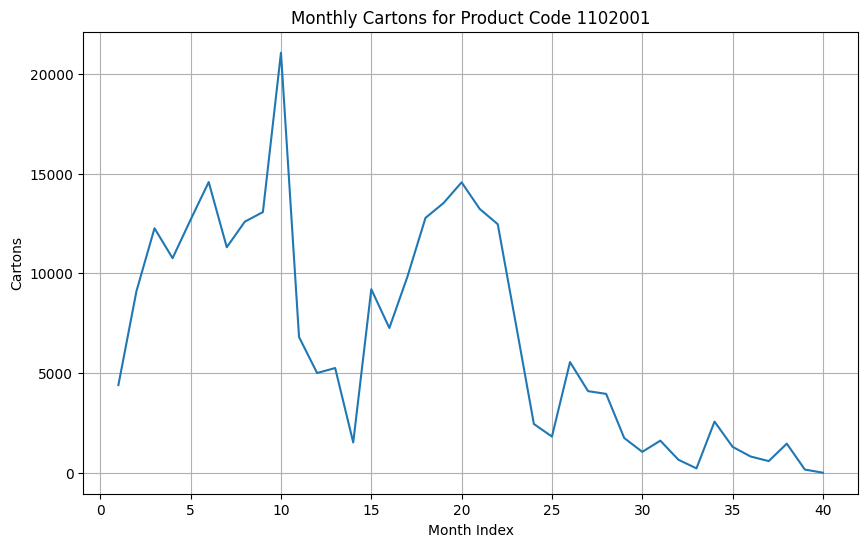


ADF Test Results:
ADF Statistic: -1.199997954032737
p-value: 0.6735965920550687
Critical Values:
   1%: -3.6327426647230316
   5%: -2.9485102040816327
   10%: -2.6130173469387756
Data is likely non-stationary.

Manual ARIMA Model Order: (1, 0, 1), Seasonal Order: (1, 0, 1, 12)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


<Figure size 1000x800 with 0 Axes>

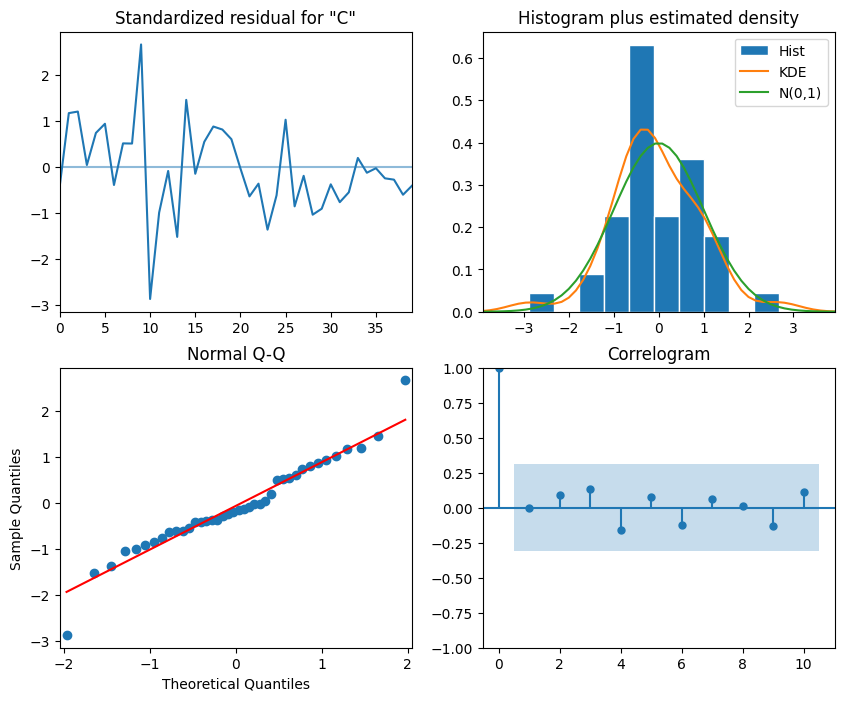


Forecasted Cartons for the Next 12 Months (سس بطري کچاپ ساده460گرمي):
Month 41: 697 cartons
Month 42: 1,362 cartons
Month 43: 2,167 cartons
Month 44: 2,490 cartons
Month 45: 2,801 cartons
Month 46: 3,802 cartons
Month 47: 3,630 cartons
Month 48: 3,641 cartons
Month 49: 3,795 cartons
Month 50: 4,305 cartons
Month 51: 4,110 cartons
Month 52: 4,197 cartons

Average Monthly Forecast for سس بطري کچاپ ساده460گرمي: 3,083 cartons


In [ ]:
#Sales Forecast for the Second Top Product
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.stattools import adfuller


#Ensure MonthNumeric is treated as an ordered index
Data["YearMonth"] = Data["Year"].astype(str) + "-" + Data["MonthNumeric"].astype(str)

#Filter data for the target product group
ProductData = Data[Data['ProductCode'] == 1102001]
MonthlyCartons = ProductData.groupby("YearMonth")["Cartons"].sum()
MonthlyCartons.index = range(1, len(MonthlyCartons) + 1)

# 1. Data Exploration & Stationarity Check
plt.figure(figsize=(10, 6))
plt.plot(MonthlyCartons)
plt.title(f'Monthly Cartons for Product Code 1102001')
plt.xlabel('Month Index')
plt.ylabel('Cartons')
plt.grid(True)
plt.show()

# Perform ADF test for stationarity
adf_test = adfuller(MonthlyCartons)
print("\nADF Test Results:")
print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')
print('Critical Values:')
for key, value in adf_test[4].items():
    print(f'   {key}: {value}')
if adf_test[1] <= 0.05:
    print("Data is likely stationary.")
else:
    print("Data is likely non-stationary.")

# 2. Manually specify SIMPLER ARIMA model order
manual_order = (1, 0, 1) # Simpler order (p, d, q)
manual_seasonal_order = (1, 0, 1, 12) # Simpler seasonal order (P, D, Q, m)

print(f"\nManual ARIMA Model Order: {manual_order}, Seasonal Order: {manual_seasonal_order}")


# 3. Train and Forecast with Manual Order
try:
    model_fit = ARIMA(MonthlyCartons, order=manual_order,
                      seasonal_order=manual_seasonal_order).fit()

    # 4. Model Diagnostics
    plt.figure(figsize=(10, 8))
    model_fit.plot_diagnostics(figsize=(10, 8))
    plt.show()

    forecast = model_fit.forecast(steps=12)
except Exception as e:
    print(f"Error forecasting for {'سس بطري کچاپ ساده460گرمي'}: {e}")

#Print Forecasted Cartons
print(f"\nForecasted Cartons for the Next 12 Months ({'سس بطري کچاپ ساده460گرمي'}):")
for i, value in enumerate(forecast, start=len(MonthlyCartons) + 1):
    print(f"Month {i}: {value:,.0f} cartons")

#Calculate the average of the forecasted values
AverageForecast = forecast.mean()
print(f"\nAverage Monthly Forecast for {'سس بطري کچاپ ساده460گرمي'}: {AverageForecast:,.0f} cartons")

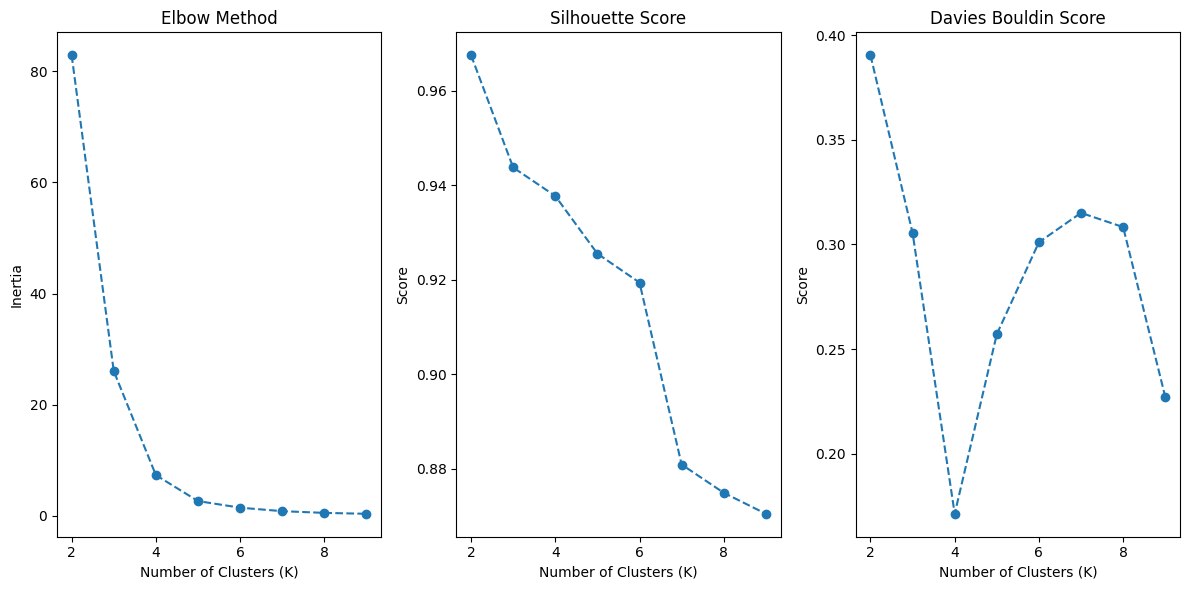

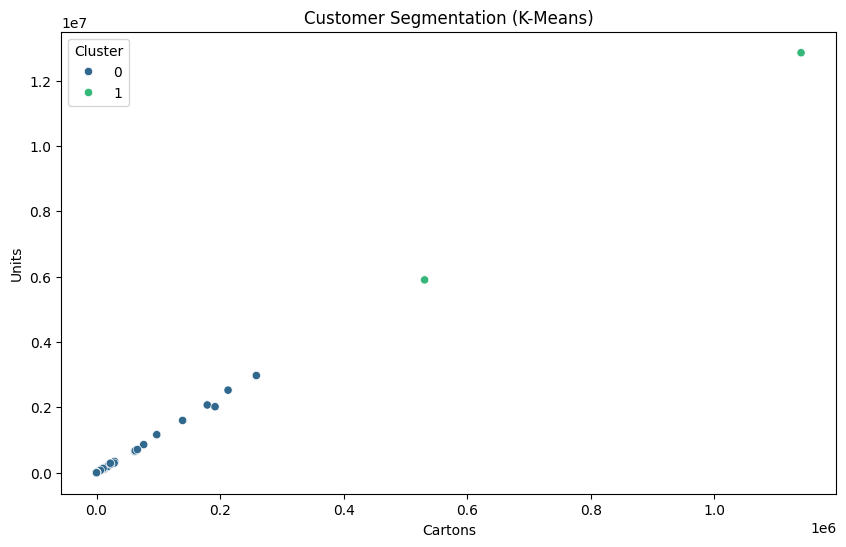

In [ ]:
#Apply K-Means clustering

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

#Selecting customer data related
CustomerData = Data.groupby('CustomerName')[['Cartons', 'Units']].sum().reset_index()

#Normalize data
scaler = StandardScaler()
ScaledData = scaler.fit_transform(CustomerData[['Cartons', 'Units']])

#Determine the optimal clusters (elbow method and silhouette score)
optimal = []
silhouette_scores = []
davies_bouldin_scores = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(ScaledData)
    optimal.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(ScaledData, labels))
    davies_bouldin_scores.append(davies_bouldin_score(ScaledData, labels))

#Plot the elbow curve
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.plot(range(2, 10), optimal, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')

#Plot silhouette scores
plt.subplot(1, 3, 2)
plt.plot(range(2, 10), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Score')

#Plot davies bouldin scores
plt.subplot(1, 3, 3)
plt.plot(range(2, 10), davies_bouldin_scores, marker='o', linestyle='--')
plt.title('Davies Bouldin Score')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

#Apply K-Means clustering with the chosen number of clusters
chosen_k = 2
kmeans = KMeans(n_clusters=chosen_k, random_state=42, n_init=10)
CustomerData['Cluster'] = kmeans.fit_predict(ScaledData)
print('\n')

#Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=CustomerData, x='Cartons', y='Units', hue='Cluster', palette='viridis')
plt.title('Customer Segmentation (K-Means)')
plt.xlabel('Cartons')
plt.ylabel('Units')
plt.show()

In [ ]:
#Create summary table by grouping by 'Cluster'

Data = pd.merge(Data, CustomerData[['CustomerName', 'Cluster']], on='CustomerName', how='left')

summary_table = Data.groupby(['CustomerName', 'Cluster'])[['Cartons', 'NetSales']].sum().reset_index().groupby('Cluster').agg(
    Net_Sales=('NetSales', 'sum'),
    Units_Sold=('Cartons', 'sum'),
    Count=('CustomerName', 'nunique')  #Count unique customers in each cluster
).reset_index()

#Format numbers with commas for readability
summary_table['Net_Sales'] = summary_table['Net_Sales'].apply(lambda x: f"{x:,.0f}")
summary_table['Units_Sold'] = summary_table['Units_Sold'].apply(lambda x: f"{x:,.0f}")

#Display the final formatted table
print("\n🔹 Clustering Results Table:")
print(summary_table.to_markdown(index=False))  # Prints a nice table format

#If using Jupyter Notebook, display the table properly
display(summary_table)


🔹 Clustering Results Table:
|   Cluster | Net_Sales         | Units_Sold   |   Count |
|----------:|:------------------|:-------------|--------:|
|         0 | 5,419,736,554,911 | 1,622,379    |     176 |
|         1 | 5,573,851,249,329 | 1,671,151    |       2 |


,Cluster,Net_Sales,Units_Sold,Count
0,0,"5,419,736,554,911","1,622,379",176
1,1,"5,573,851,249,329","1,671,151",2


In [ ]:
import pandas as pd

# Check if 'Cluster' column already exists in Data
if 'Cluster' in Data.columns:
    Data = Data.drop(columns=['Cluster'])  # Drop the existing 'Cluster' column

# Now perform the merge
Data = pd.merge(Data, CustomerData[['CustomerName', 'Cluster']], on='CustomerName', how='left')

# Create summary table with a list of customer names
summary_table = Data.groupby(['CustomerName', 'Cluster'])[['Cartons', 'NetSales']].sum().reset_index().groupby('Cluster').agg(
    Net_Sales=('NetSales', 'sum'),
    Units_Sold=('Cartons', 'sum'),
    Count=('CustomerName', 'nunique'),  # Count unique customers in each cluster
    Customers=('CustomerName', lambda x: ', '.join(x.unique()))  # Concatenate customer names as a string
).reset_index()

# Format numbers with commas for readability
summary_table['Net_Sales'] = summary_table['Net_Sales'].apply(lambda x: f"{x:,.0f}")
summary_table['Units_Sold'] = summary_table['Units_Sold'].apply(lambda x: f"{x:,.0f}")

# Display the final formatted table
print("\n🔹 Clustering Results Table:")
print(summary_table.to_markdown(index=False))  # Prints a nice table format

# If using Jupyter Notebook, display the table properly
display(summary_table)